In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pymongo import MongoClient
from house_price_geo_analysis import calc_manhattan_dist, add_distance_columns, analyze_dist_col, plot_dist_analysis
from locations_coords import LOCATIONS
from conv_calculation import conv_factor_kc
from datetime import datetime

In [2]:
df_houseprice = pd.read_csv(r"C:\Users\Wiktoria\Desktop\Python Basics\Projekt\Regresja liniowa\kc_house_data.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21610 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21610 non-null  float64
 5   sqft_living    21612 non-null  float64
 6   sqft_lot       21610 non-null  float64
 7   floors         21612 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21609 non-null  float64
 13  sqft_basement  21610 non-null  float64
 14  yr_built       21612 non-null  float64
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df_houseprice.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161000e+04,21613.000000,21610.000000,21612.000000,2.161000e+04,21612.000000,21613.000000,21613.000000,21613.000000,21613.000000,21609.000000,21610.000000,21612.000000,21613.000000,21613.000000,21613.000000,21613.000000,21610.000000,21611.000000
mean,4.580302e+09,5.401135e+05,3.370842,2.114762,2079.870581,1.510840e+04,1.494286,0.007542,0.234303,3.409430,7.656873,1788.267296,291.441694,1971.005367,84.402258,98077.939805,47.560053,-122.213896,1986.489542,12768.639813
std,2.876566e+09,3.671457e+05,0.930062,0.770163,918.452144,4.142320e+04,0.539990,0.086517,0.766318,0.650743,1.175459,828.020670,442.557963,29.374071,401.679240,53.505026,0.138564,0.140828,685.301490,27305.296495
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219625e+05,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df_houseprice.isna().any()

id               False
date             False
price             True
bedrooms         False
bathrooms         True
sqft_living       True
sqft_lot          True
floors            True
waterfront       False
view             False
condition        False
grade            False
sqft_above        True
sqft_basement     True
yr_built          True
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15     True
sqft_lot15        True
dtype: bool

In [7]:
df_houseprice.isna().sum()

id               0
date             0
price            3
bedrooms         0
bathrooms        3
sqft_living      1
sqft_lot         3
floors           1
waterfront       0
view             0
condition        0
grade            0
sqft_above       4
sqft_basement    3
yr_built         1
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    3
sqft_lot15       2
dtype: int64

In [8]:
df_houseprice.drop(columns='id', inplace=True)

<Axes: >

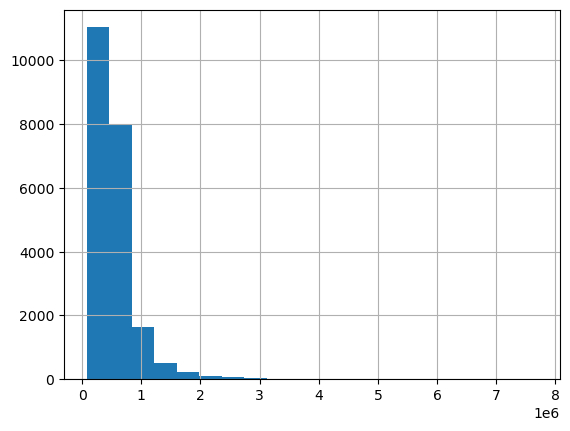

In [9]:
#Filling in missing data
#PRICE
plt.figure()
df_houseprice['price'].hist(bins=20)

In [10]:
df_houseprice['price'] = df_houseprice['price'].fillna(df_houseprice['price'].median())

<Axes: >

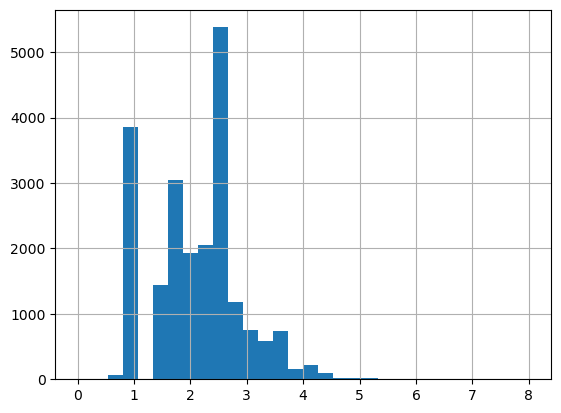

In [11]:
#BATHROOMS
plt.figure()
df_houseprice['bathrooms'].hist(bins=30)

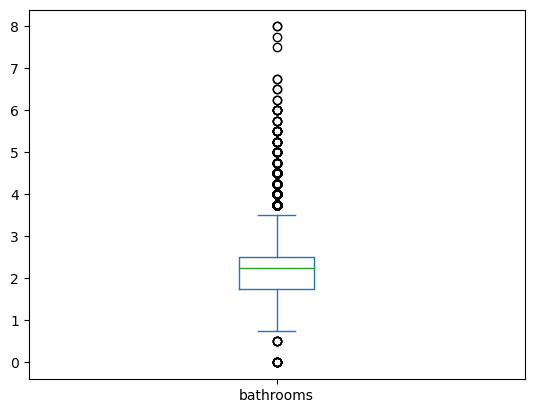

In [12]:
plt.figure()
df_houseprice['bathrooms'].plot(kind='box')
df_houseprice['bathrooms'].median()
df_houseprice['bathrooms'] = df_houseprice['bathrooms'].fillna(df_houseprice['bathrooms'].median())

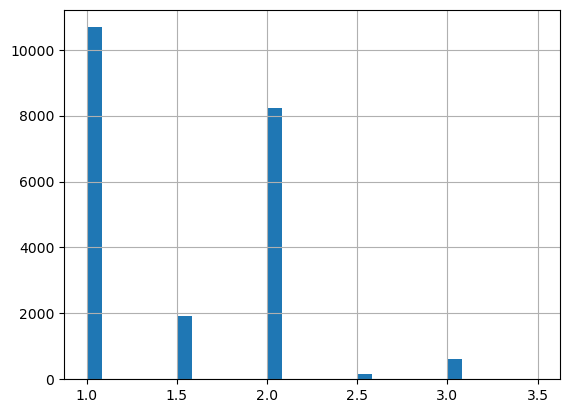

In [13]:
#FLOORS
plt.figure()
df_houseprice['floors'].hist(bins=30)
df_houseprice['floors'].median()
df_houseprice['floors'].mode()[0]
df_houseprice['floors'] = df_houseprice['floors'].fillna(df_houseprice['floors'].mode()[0])

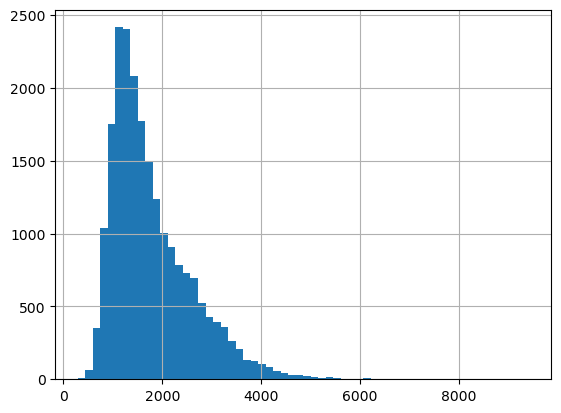

In [14]:
#LIVING SPACE ABOVE GROUND LEVEL
plt.figure()
df_houseprice['sqft_above'].hist(bins=60)
df_houseprice['sqft_above'] = df_houseprice['sqft_above'].fillna(df_houseprice['sqft_above'].median())

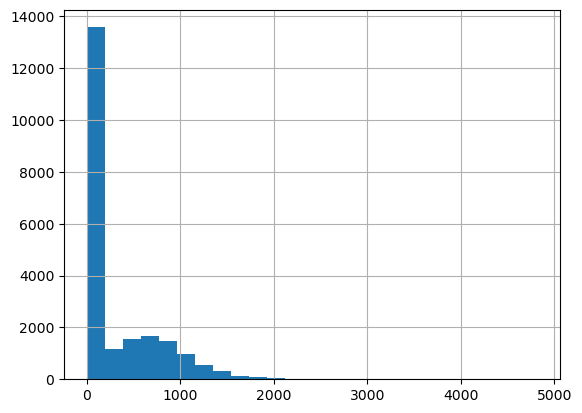

In [15]:
#BASEMENT
plt.figure()
df_houseprice['sqft_basement'].hist(bins=25)
df_houseprice['sqft_basement'] = df_houseprice['sqft_basement'].fillna(df_houseprice['sqft_basement'].mode()[0])

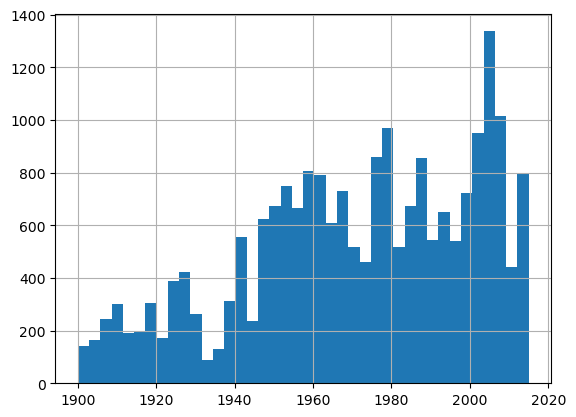

In [16]:
#YR OF BUILT
plt.figure()
df_houseprice['yr_built'].hist(bins=40)
df_houseprice['yr_built'] = df_houseprice['yr_built'].fillna(method = 'ffill')

<Axes: >

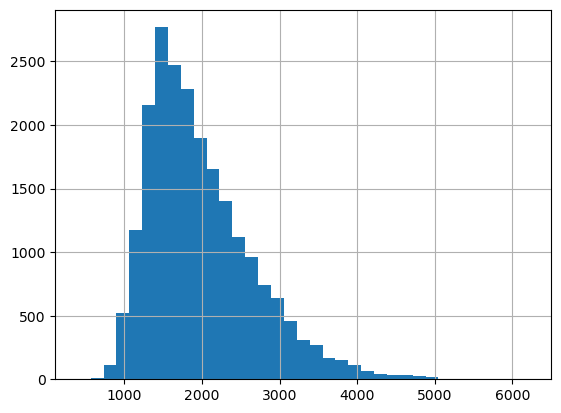

In [17]:
#LIVING SPACE OF NEAREST 15
plt.figure()
df_houseprice['sqft_living15'].hist(bins=35)

In [19]:
df_houseprice['sqft_living15'].median()

1840.0

In [20]:
df_houseprice['sqft_living15'].mean()

1986.4895418787598

In [21]:
df_houseprice['sqft_living15'].mode()[0]

1540.0

In [22]:
df_houseprice['sqft_living15'] = df_houseprice['sqft_living15'].fillna(df_houseprice['sqft_living15'].median())

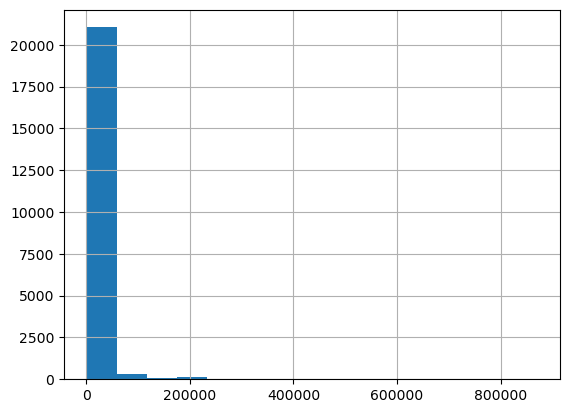

In [23]:
#PLOT AREA OF NEAREST 15
plt.figure()
df_houseprice['sqft_lot15'].hist(bins=15)
df_houseprice['sqft_lot15'] = df_houseprice['sqft_lot15'].fillna(df_houseprice['sqft_lot15'].median())

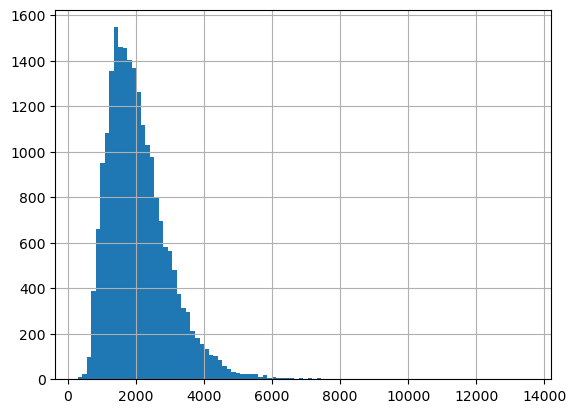

In [24]:
#LIVING SPACE
plt.figure()
df_houseprice['sqft_living'].hist(bins=100)
df_houseprice['sqft_living'] = df_houseprice['sqft_living'].fillna(df_houseprice['sqft_living'].median())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

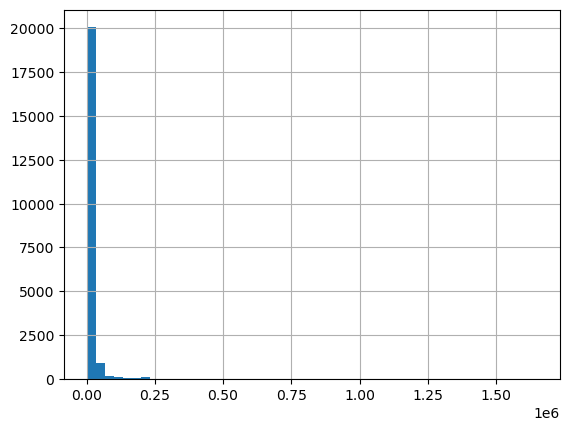

In [25]:
#PLOT AREA
plt.figure()
df_houseprice['sqft_lot'].hist(bins=50)
df_houseprice['sqft_lot'] = df_houseprice['sqft_lot'].fillna(df_houseprice['sqft_lot'].median())
df_houseprice.isna().sum()

In [26]:
df_houseprice['price_by_sqft'] = df_houseprice['price'] / df_houseprice['sqft_living']

In [27]:
df_houseprice['price_by_sqft'].isnull().any()

False

In [28]:
df_houseprice['price_by_sqft'].describe()

count    21613.000000
mean       264.169465
std        110.060832
min         87.588235
25%        182.291667
50%        244.680851
75%        318.326693
max        810.138889
Name: price_by_sqft, dtype: float64

In [29]:
col_to_convert = ['dist_to_downtown', 'dist_to_bellevue', 'dist_to_northwest_seattle']


Stats for dist_to_downtown_km
count    21613.000000
mean        18.935686
std         11.557117
min          1.010442
25%          9.311037
50%         17.080214
75%         25.979590
max         85.056773
Name: dist_to_downtown_km, dtype: float64
Correlation dist_to_downtown_km with price (in general) column equals: -0.2104302753149724
Correlation dist_to_downtown_km with price by square foot column equals: -0.4757989863856972

Stats for dist_to_bellevue_km
count    21613.000000
mean        17.527340
std          8.653873
min          0.269451
25%         11.414254
50%         16.720946
75%         21.017196
max         75.536163
Name: dist_to_bellevue_km, dtype: float64
Correlation dist_to_bellevue_km with price (in general) column equals: -0.35852379110732124
Correlation dist_to_bellevue_km with price by square foot column equals: -0.4217023579521428

Stats for dist_to_northwest_seattle_km
count    21613.000000
mean        23.851554
std         13.845207
min          0.067363
25%  

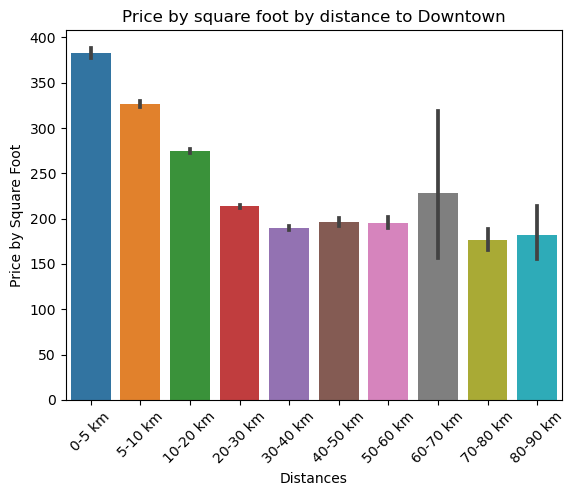

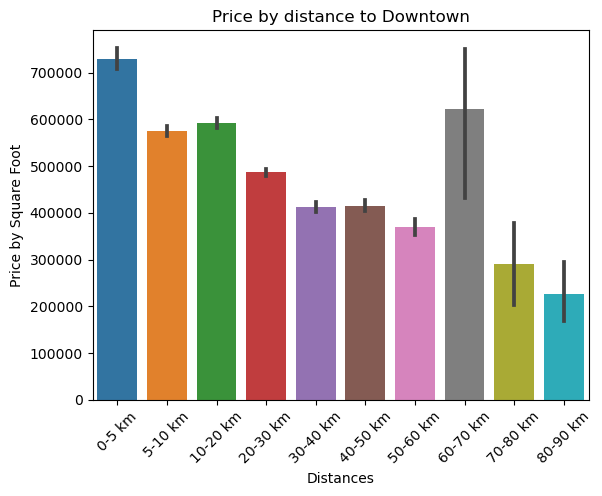

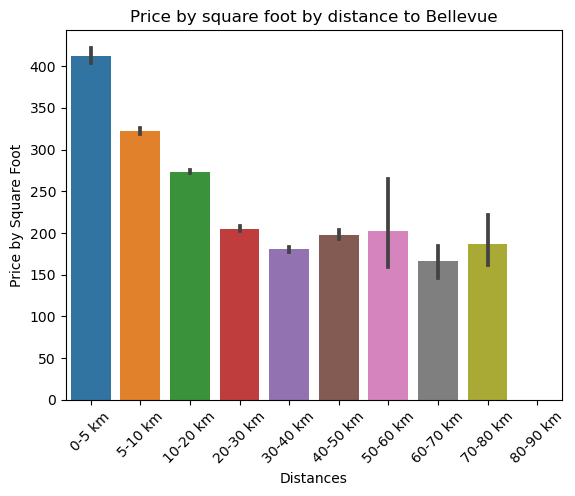

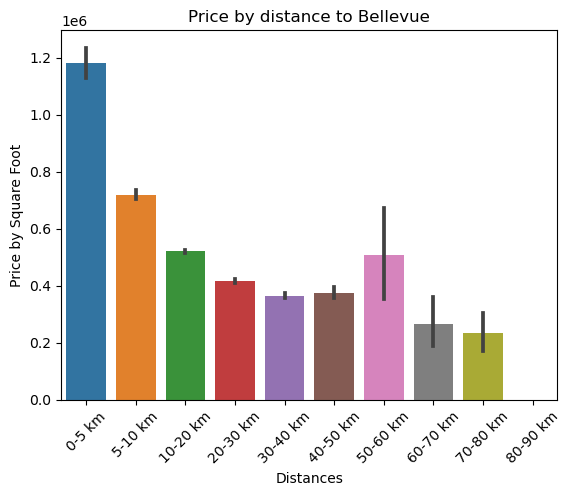

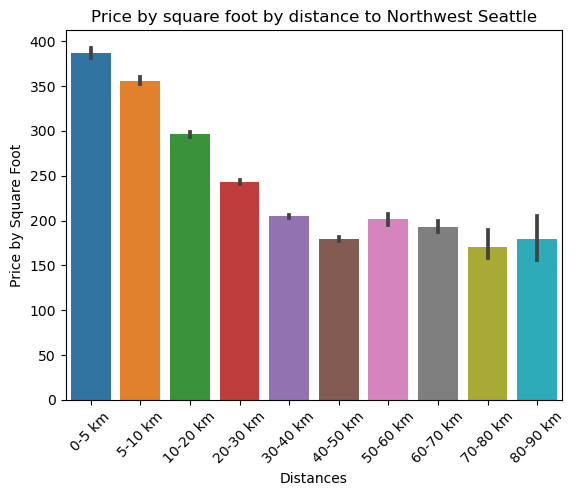

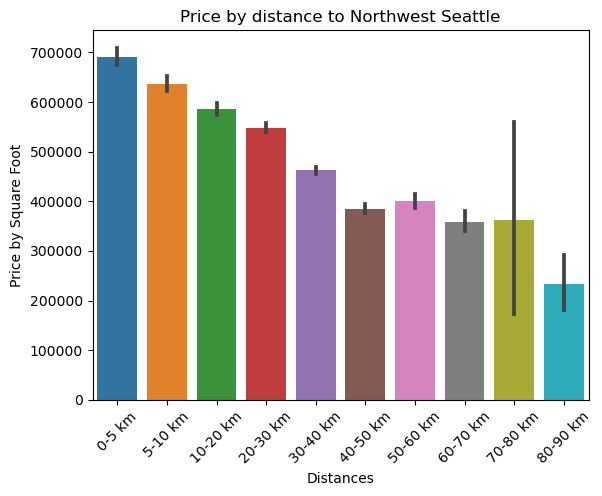

In [30]:
df_houseprice = add_distance_columns(df_houseprice, LOCATIONS)
df_houseprice = analyze_dist_col(df_houseprice, col_to_convert, conv_factor_kc)
df_houseprice = plot_dist_analysis(df_houseprice)

Text(0, 0.5, 'Count')

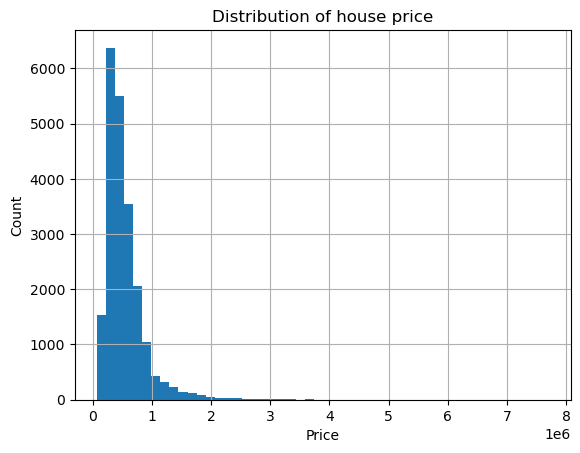

In [31]:
#EDA

#TARGET
plt.figure()
df_houseprice['price'].hist(bins=50)
plt.title('Distribution of house price')
plt.xlabel('Price')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

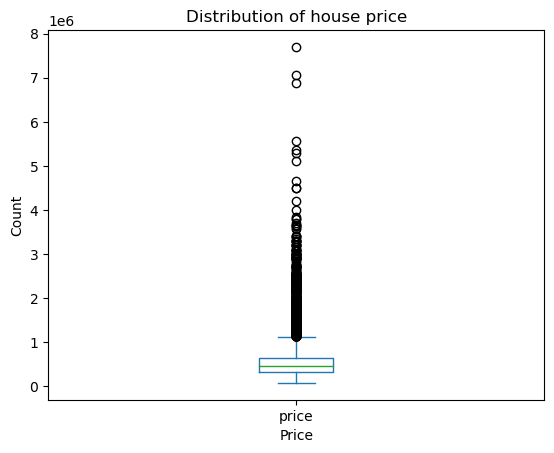

In [32]:
plt.figure()
df_houseprice['price'].plot(kind='box')
plt.title('Distribution of house price')
plt.xlabel('Price')
plt.ylabel('Count')

In [33]:
df_houseprice = df_houseprice[df_houseprice['price'] <= 4000000.0 ]

Text(0, 0.5, 'Count')

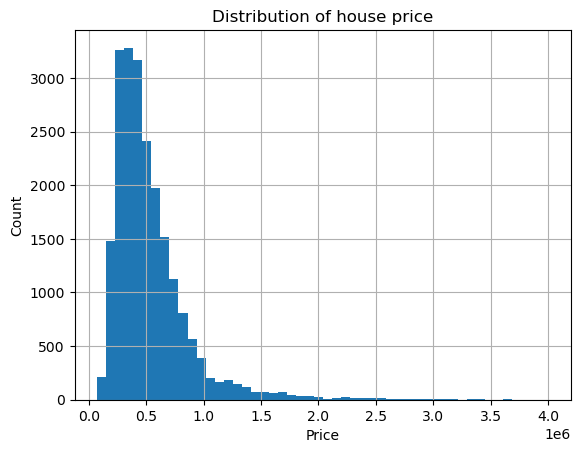

In [34]:
plt.figure()
df_houseprice['price'].hist(bins=50)
plt.title('Distribution of house price')
plt.xlabel('Price')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

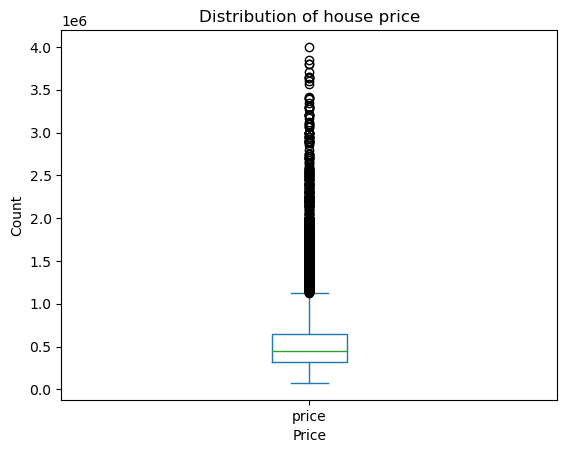

In [35]:
plt.figure()
df_houseprice['price'].plot(kind='box')
plt.title('Distribution of house price')
plt.xlabel('Price')
plt.ylabel('Count')

In [36]:
df_houseprice['price_log'] = np.log(df_houseprice['price'])

Text(0, 0.5, 'Count')

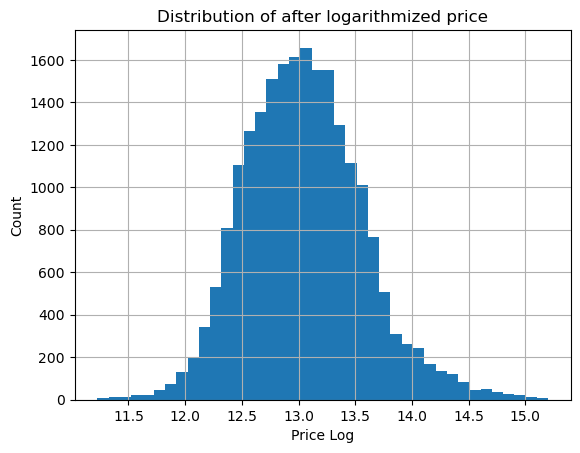

In [37]:
plt.figure()
df_houseprice['price_log'].hist(bins=40)
plt.title('Distribution of after logarithmized price')
plt.xlabel('Price Log')
plt.ylabel('Count')

<Axes: >

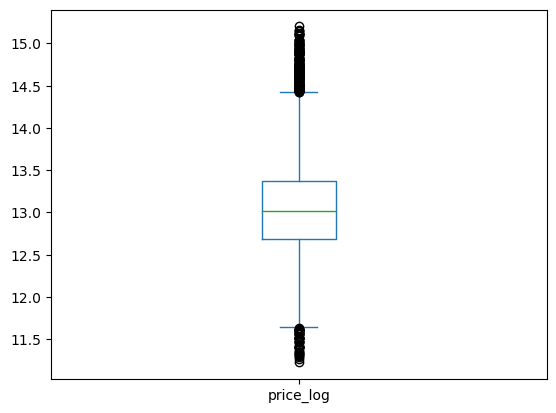

In [38]:
plt.figure()
df_houseprice['price_log'].plot.box()

In [39]:
#What is the range of price?
df_houseprice['price'].min()

75000.0

In [40]:
df_houseprice['price'].max()

4000000.0

Text(0, 0.5, 'Count')

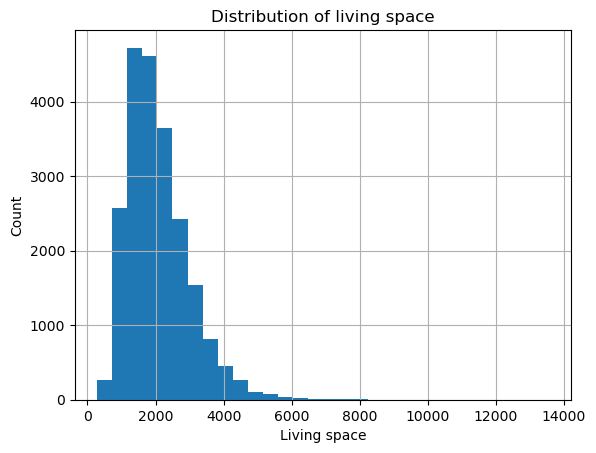

In [41]:
#Does living space affect the price?
plt.figure()
df_houseprice['sqft_living'].hist(bins=30)
plt.title('Distribution of living space')
plt.xlabel('Living space')
plt.ylabel('Count')

Text(0.5, 0, 'Living space')

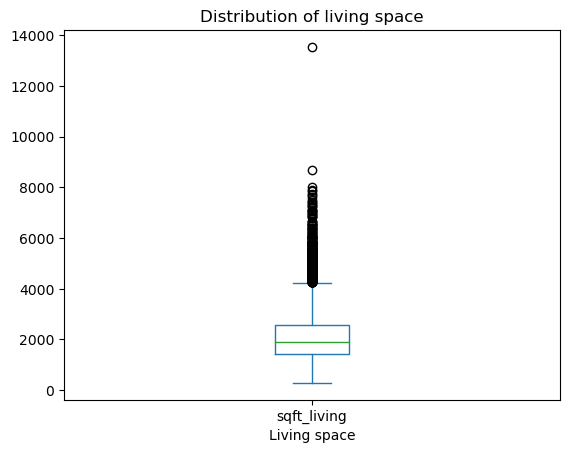

In [42]:
plt.figure()
df_houseprice['sqft_living'].plot.box()
plt.title('Distribution of living space')
plt.xlabel('Living space')

In [43]:
df_houseprice = df_houseprice[df_houseprice['sqft_living'] <= 8000.0]

In [44]:
living_space_price = df_houseprice.groupby(df_houseprice['sqft_living'])['price'].mean()

Text(0, 0.5, 'Price')

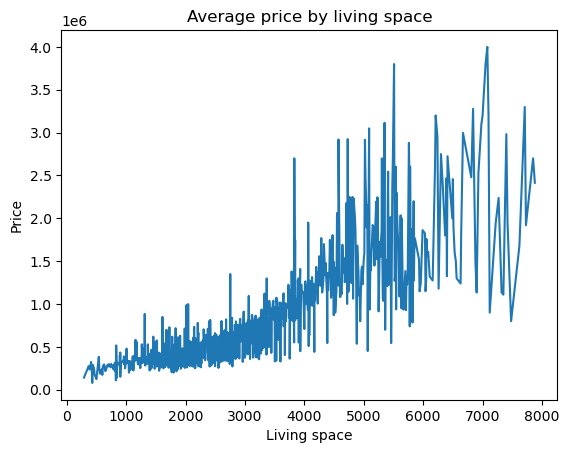

In [45]:
plt.figure()
living_space_price.plot(kind='line')
plt.title('Average price by living space')
plt.xlabel('Living space')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

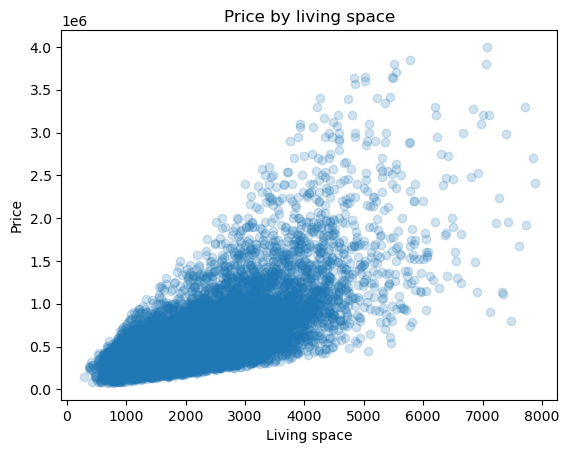

In [46]:
plt.figure()
plt.scatter(df_houseprice['sqft_living'], df_houseprice['price'], alpha=0.2)
plt.title('Price by living space')
plt.xlabel('Living space')
plt.ylabel('Price')

In [47]:
corr_living_space = df_houseprice['sqft_living'].corr(df_houseprice['price'])
f'Correlation coefficient equals {corr_living_space}'

'Correlation coefficient equals 0.6934172026588049'

Text(0, 0.5, 'Count')

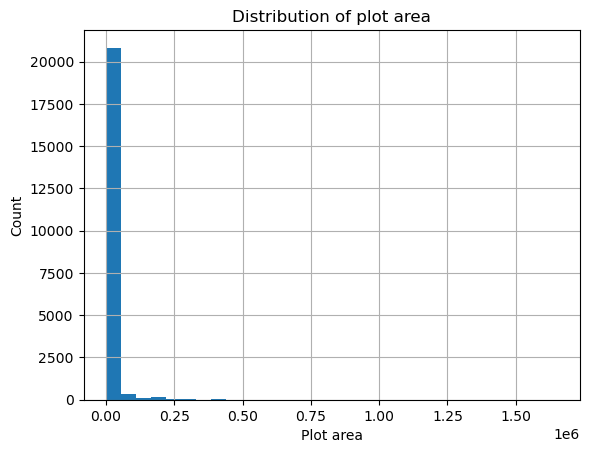

In [48]:
#Does plot area affect the price?
plt.figure()
df_houseprice['sqft_lot'].hist(bins=30)
plt.title('Distribution of plot area')
plt.xlabel('Plot area')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

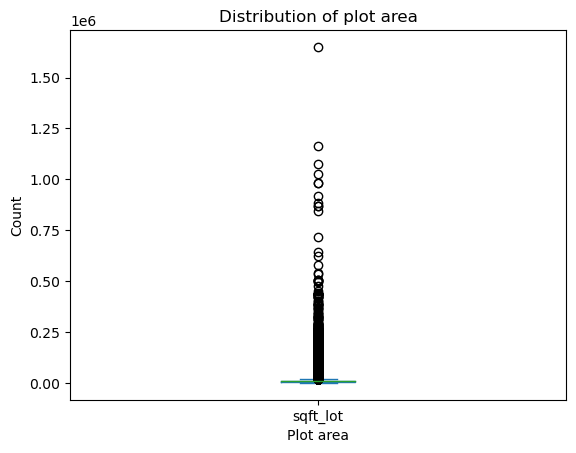

In [49]:
plt.figure()
df_houseprice['sqft_lot'].plot.box()
plt.title('Distribution of plot area')
plt.xlabel('Plot area')
plt.ylabel('Count')

Text(0, 0.5, 'Price')

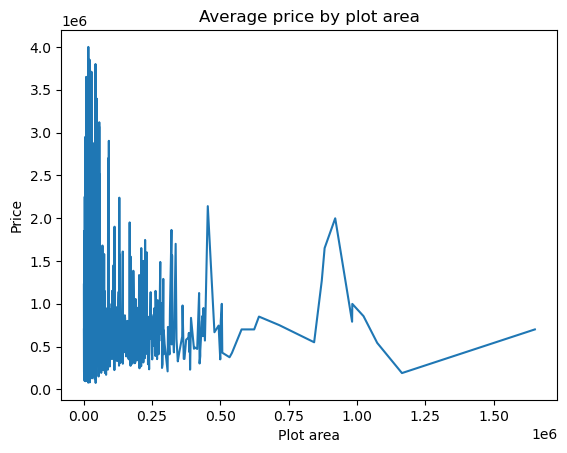

In [50]:
plot_area_price = df_houseprice.groupby(df_houseprice['sqft_lot'])['price'].mean()

plt.figure()
plot_area_price.plot(kind='line')
plt.title('Average price by plot area')
plt.xlabel('Plot area')
plt.ylabel('Price')

Text(0, 0.5, 'price')

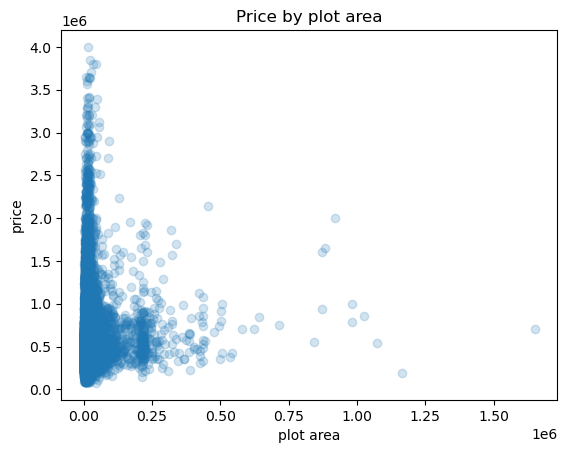

In [51]:
plt.figure()
plt.scatter(df_houseprice['sqft_lot'], df_houseprice['price'], alpha=0.2)
plt.title('Price by plot area')
plt.xlabel('plot area')
plt.ylabel('price')

In [52]:
corr_plot_area = df_houseprice['sqft_lot'].corr(df_houseprice['price'])
f'Correlation coefficient equals {corr_plot_area}'

'Correlation coefficient equals 0.09011725157474261'

In [53]:
df_houseprice = df_houseprice[df_houseprice['sqft_lot'] <= 500000.0]

<Axes: >

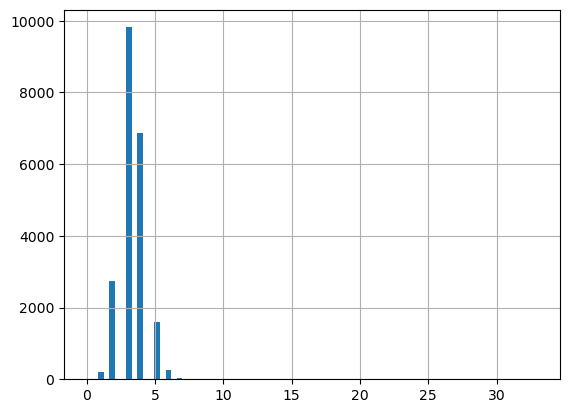

In [54]:
#How the number of bedrooms and bathrooms affect the price?
plt.figure()
df_houseprice['bedrooms'].hist(bins=80)

In [55]:
number_of_records_per_bedroom = df_houseprice.groupby('bedrooms').size()
number_of_records_per_bedroom

bedrooms
0       13
1      198
2     2755
3     9818
4     6874
5     1590
6      269
7       37
8       13
9        6
10       3
11       1
33       1
dtype: int64

Text(0, 0.5, 'Count')

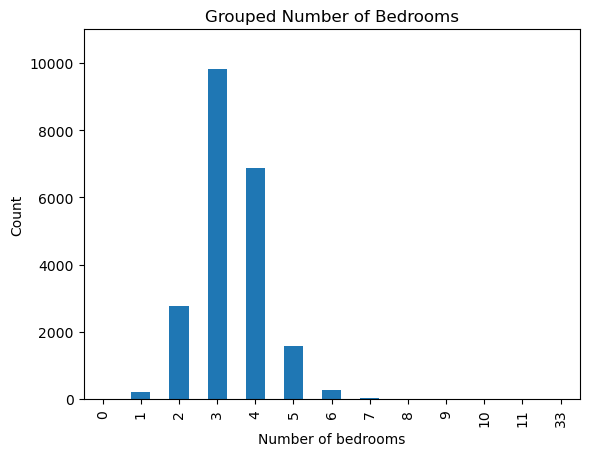

In [56]:
plt.figure()
number_of_records_per_bedroom.plot(kind='bar')
plt.ylim(0, 11000)
plt.title('Grouped Number of Bedrooms')
plt.xlabel('Number of bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Price')

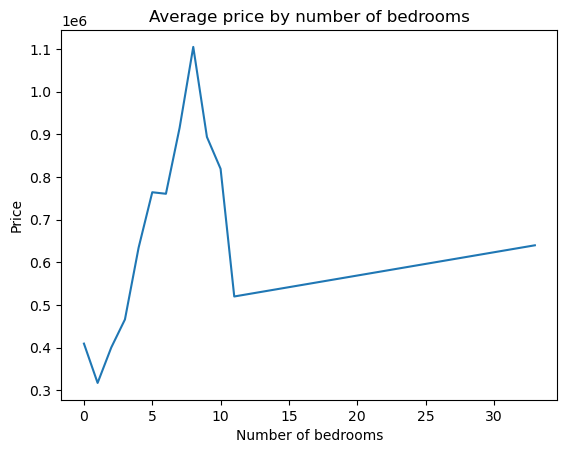

In [57]:
number_of_bedrooms = df_houseprice.groupby('bedrooms')['price'].mean()

plt.figure()
number_of_bedrooms.plot(kind='line')
plt.title('Average price by number of bedrooms')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

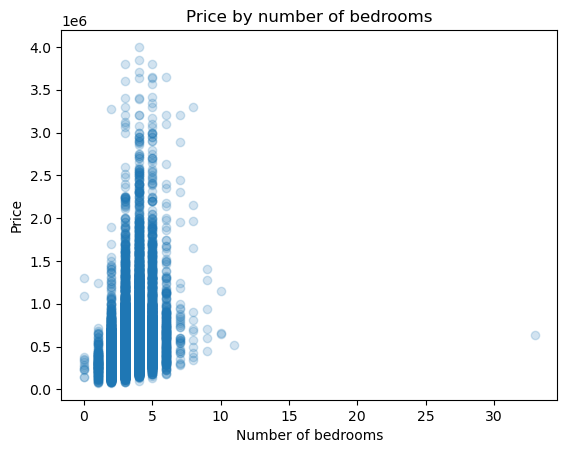

In [58]:
plt.figure()
plt.scatter(df_houseprice['bedrooms'], df_houseprice['price'], alpha=0.2)
plt.title('Price by number of bedrooms')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price')

Text(0.5, 1.0, 'Number of bedrooms')

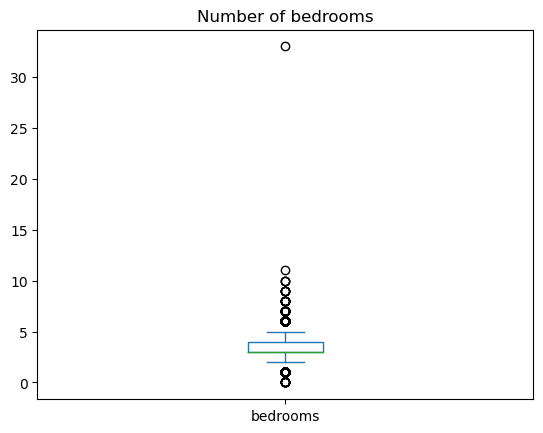

In [59]:
plt.figure()
df_houseprice['bedrooms'].plot.box()
plt.title('Number of bedrooms')

In [60]:
corr_bedrooms_price = df_houseprice['bedrooms'].corr(df_houseprice['price'])
f'Correlation coefficient equals {corr_bedrooms_price}'

'Correlation coefficient equals 0.3098269717415556'

In [61]:
df_houseprice = df_houseprice[df_houseprice['bedrooms'] <= 9.0 ]

<Axes: >

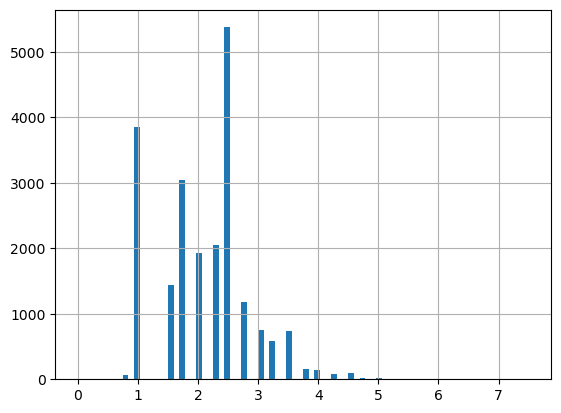

In [62]:
plt.figure()
df_houseprice['bathrooms'].hist(bins=80)

Text(0, 0.5, 'Count')

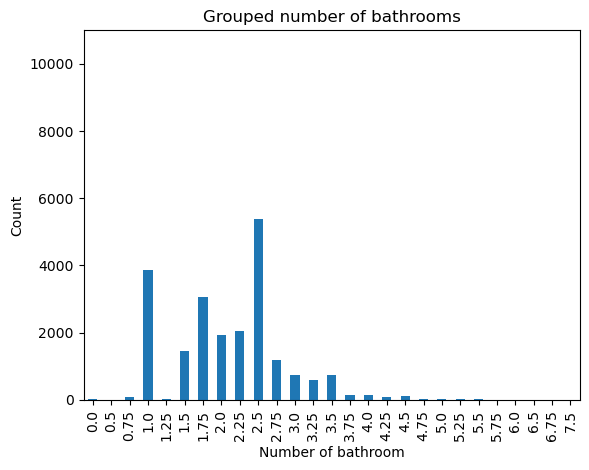

In [63]:
number_of_records_per_bathroom = df_houseprice.groupby('bathrooms').size()

plt.figure()
number_of_records_per_bathroom.plot(kind='bar')
plt.ylim(0, 11000)
plt.title('Grouped number of bathrooms')
plt.xlabel('Number of bathroom')
plt.ylabel('Count')

Text(0, 0.5, 'Price')

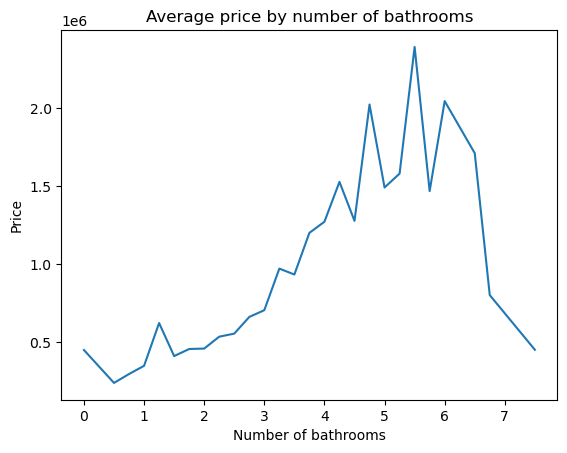

In [64]:
plt.figure()
number_of_bathrooms = df_houseprice.groupby('bathrooms')['price'].mean()
number_of_bathrooms.plot(kind='line')
plt.title('Average price by number of bathrooms')
plt.xlabel('Number of bathrooms')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

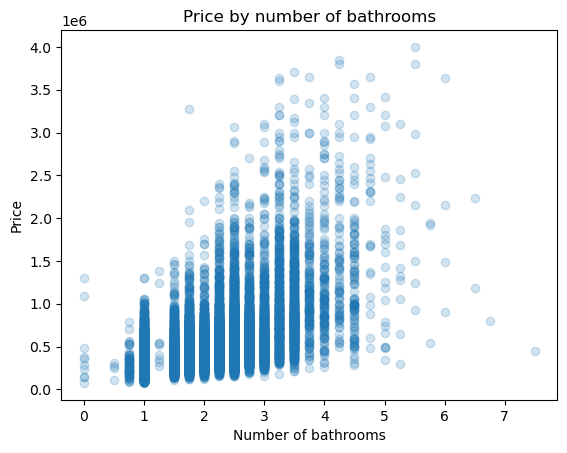

In [65]:
plt.figure()
plt.scatter(df_houseprice['bathrooms'], df_houseprice['price'], alpha=0.2)
plt.title('Price by number of bathrooms')
plt.xlabel('Number of bathrooms')
plt.ylabel('Price')

Text(0.5, 1.0, 'Number of bathrooms')

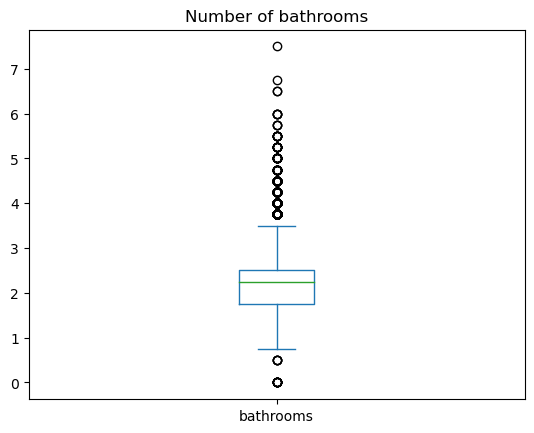

In [66]:
plt.figure()
df_houseprice['bathrooms'].plot.box()
plt.title('Number of bathrooms')

In [67]:
corr_bedrooms_price = df_houseprice['bathrooms'].corr(df_houseprice['price'])
f'Correlation coefficient equals {corr_bedrooms_price}'

'Correlation coefficient equals 0.5177597307028861'

In [68]:
df_houseprice = df_houseprice[(df_houseprice['bathrooms'] <= 4.5) & (df_houseprice['bathrooms'] >= 0.75)]

Text(0, 0.5, 'Count')

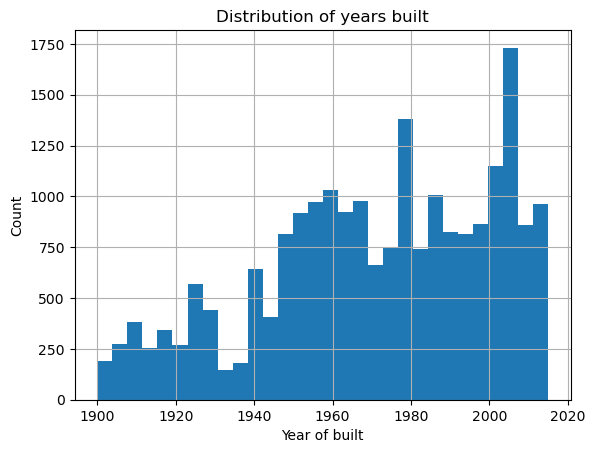

In [69]:
#Does the year of built affect the price?
plt.figure()
df_houseprice['yr_built'].hist(bins=30)
plt.title('Distribution of years built')
plt.xlabel('Year of built')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

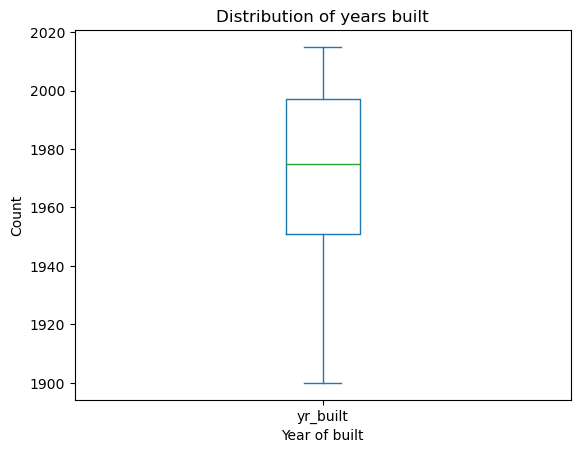

In [70]:
plt.figure()
df_houseprice['yr_built'].plot.box()
plt.title('Distribution of years built')
plt.xlabel('Year of built')
plt.ylabel('Count')

Text(0, 0.5, 'Price of house')

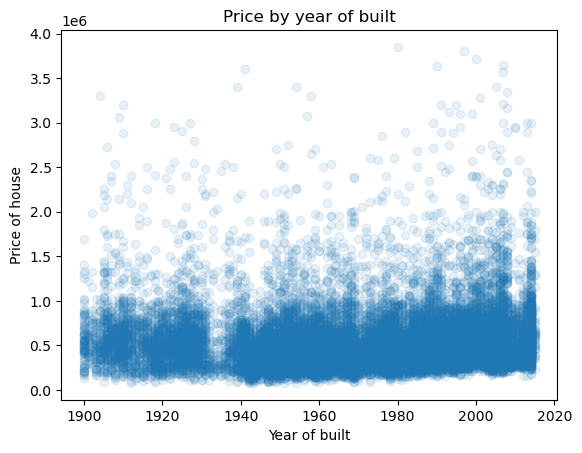

In [71]:
plt.figure()
plt.scatter(df_houseprice['yr_built'], df_houseprice['price'], alpha=0.1) 
plt.title('Price by year of built')
plt.xlabel('Year of built')
plt.ylabel('Price of house')

Text(0, 0.5, 'Average price')

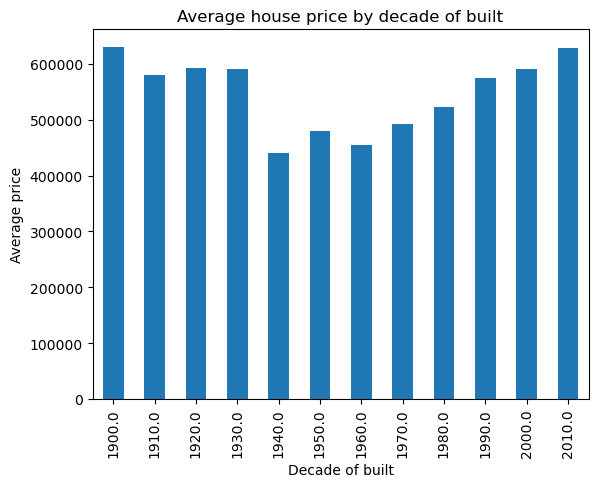

In [72]:
#decade
df_houseprice['decade'] = (df_houseprice['yr_built'] // 10) * 10
decade_price_mean = df_houseprice.groupby('decade')['price'].mean()

plt.figure()
decade_price_mean.plot(kind='bar') 
plt.title('Average house price by decade of built')
plt.xlabel('Decade of built')
plt.ylabel('Average price')

Text(0, 0.5, 'Price')

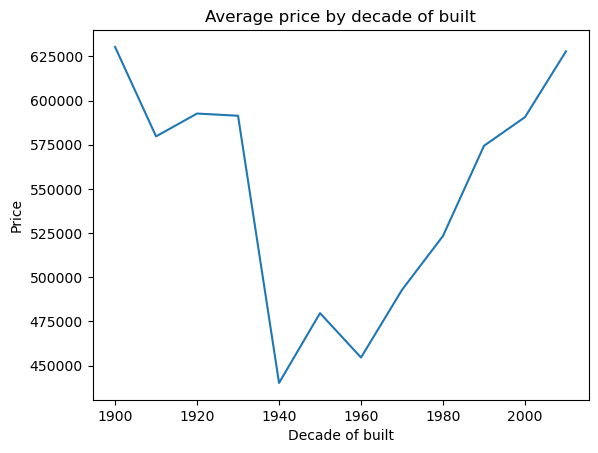

In [73]:
plt.figure()
decade_price_mean.plot(kind='line')
plt.title('Average price by decade of built')
plt.xlabel('Decade of built')
plt.ylabel('Price')

In [74]:
corr_decade_built = df_houseprice['decade'].corr(df_houseprice['price'])
f'Correlation coefficient equals {corr_decade_built}'

'Correlation coefficient equals 0.04929487841707777'

In [75]:
#Have house prices changed over time?
df_houseprice['date'] = pd.to_datetime(df_houseprice['date'])
df_houseprice['date'].info()

<class 'pandas.core.series.Series'>
Index: 21486 entries, 0 to 21612
Series name: date
Non-Null Count  Dtype         
--------------  -----         
21486 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 335.7 KB


In [76]:
#mean price for day
daily_price_mean = df_houseprice.groupby(df_houseprice['date'].dt.date)['price'].mean()

Text(0, 0.5, 'Price')

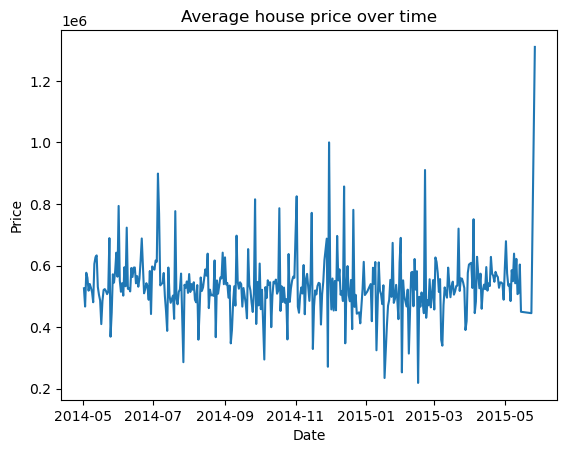

In [77]:
plt.figure()
daily_price_mean.plot(kind='line')
plt.title('Average house price over time')
plt.xlabel('Date')
plt.ylabel('Price')

In [78]:
#Are renovated houses more expensive?
renovated_houses = df_houseprice[df_houseprice['yr_renovated'] != 0]
non_renovated_houses = df_houseprice[df_houseprice['yr_renovated'] == 0]
avg_price_of_renovated = renovated_houses['price'].mean()
avg_price_of_non_renovated = non_renovated_houses['price'].mean()
median_of_renovated = renovated_houses['price'].median()
median_of_non_renovated = non_renovated_houses['price'].median()

In [79]:
f'Average price of renoavted houses is {avg_price_of_renovated}, and average price of non renovated is {avg_price_of_non_renovated}'

'Average price of renoavted houses is 733924.7878453039, and average price of non renovated is 523923.5491472718'

In [80]:
f'Median price of renovated houses is {median_of_renovated}, and non renovated houses is {median_of_non_renovated}'

'Median price of renovated houses is 600000.0, and non renovated houses is 446000.0'

Text(0, 0.5, 'Count')

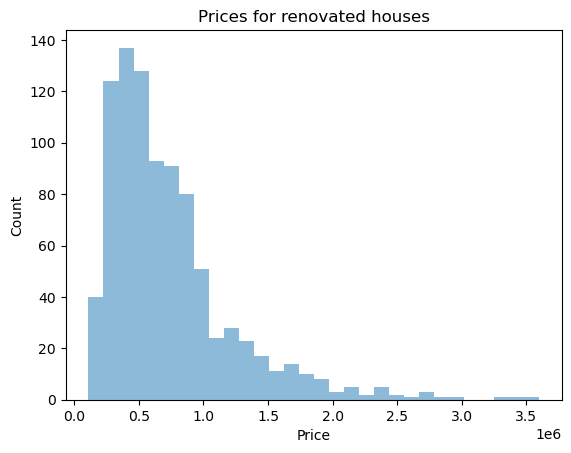

In [81]:
plt.figure()
plt.hist(renovated_houses['price'], bins=30, alpha=0.5, label='Renovated')
plt.title('Prices for renovated houses')
plt.xlabel('Price')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

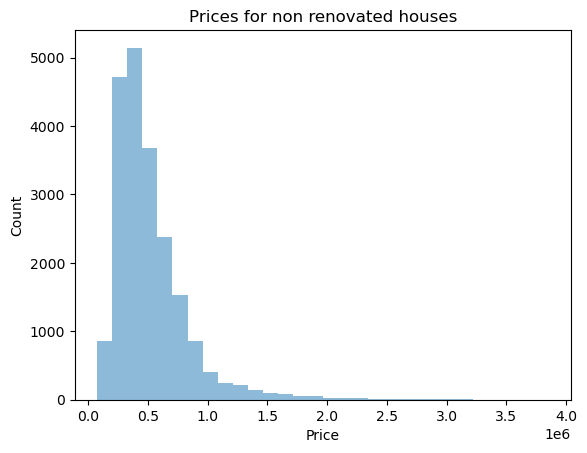

In [82]:
plt.figure()
plt.hist(non_renovated_houses['price'], bins=30, alpha=0.5, label='Non Renovated')
plt.title('Prices for non renovated houses')
plt.xlabel('Price')
plt.ylabel('Count')

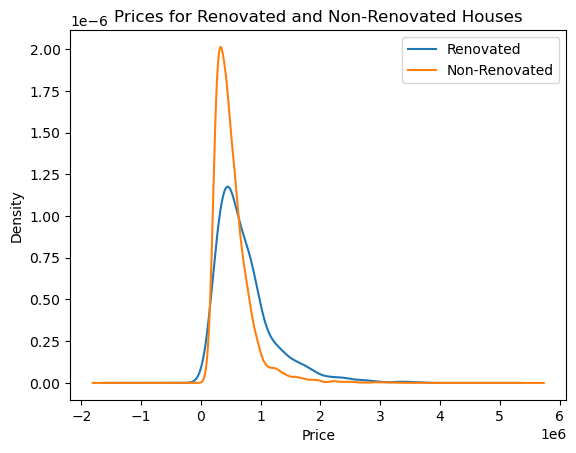

In [83]:
plt.figure()
renovated_houses['price'].plot(kind='density', label='Renovated')
non_renovated_houses['price'].plot(kind='density', label='Non-Renovated')
plt.title('Prices for Renovated and Non-Renovated Houses')
plt.xlabel('Price')
plt.legend()
plt.show()

Text(0, 0.5, 'Price')

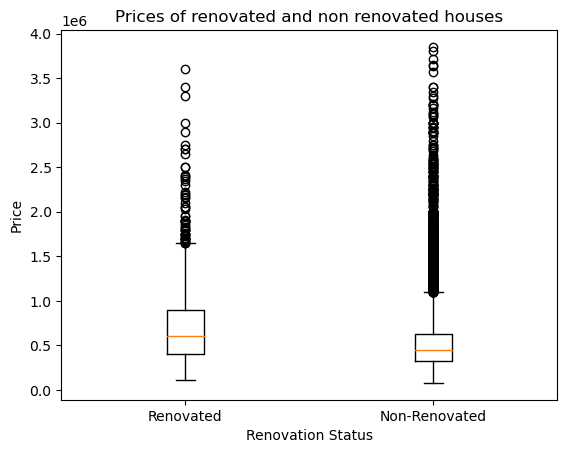

In [84]:
plt.figure()
plt.boxplot([renovated_houses['price'], non_renovated_houses['price']], labels=['Renovated', 'Non-Renovated'])
plt.title('Prices of renovated and non renovated houses')
plt.xlabel('Renovation Status')
plt.ylabel('Price')

In [85]:
corr_renovated = df_houseprice['yr_renovated'].corr(df_houseprice['price'])
corr_renovated

0.12599904863973782

In [86]:
#Do additional factors like basement space increase the price?
houses_with_basement = df_houseprice[df_houseprice['sqft_basement'] != 0]
houses_without_basement = df_houseprice[df_houseprice['sqft_basement'] == 0]

In [87]:
avg_price_with_basement = houses_with_basement['price'].mean()

In [88]:
avg_price_without_basement = houses_without_basement['price'].mean()

In [89]:
f'Average price of house with basement is {avg_price_with_basement}, and without basement is {avg_price_without_basement}'

'Average price of house with basement is 608769.1475760456, and without basement is 483831.0139250191'

<Axes: >

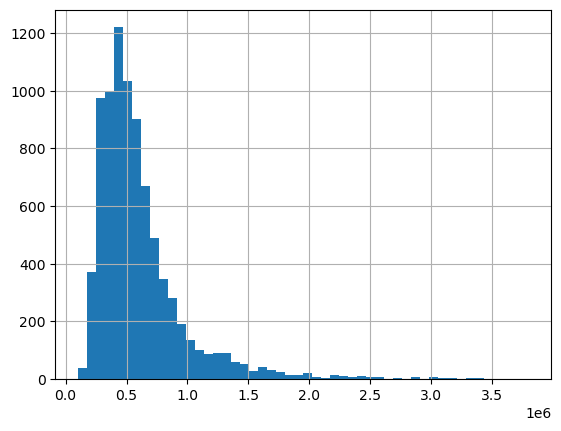

In [90]:
plt.figure()
houses_with_basement['price'].hist(bins=50)

<Axes: >

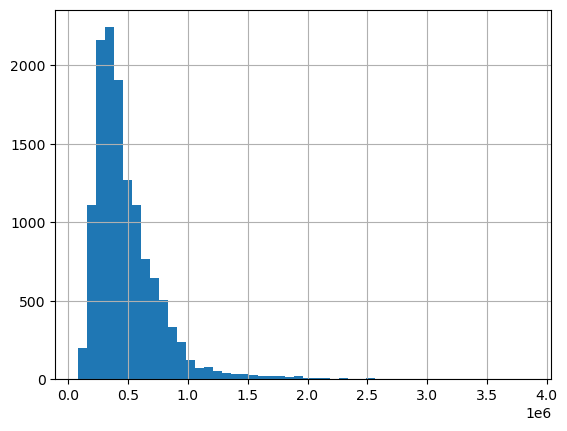

In [91]:
plt.figure()
houses_without_basement['price'].hist(bins=50)

Text(0, 0.5, 'Price')

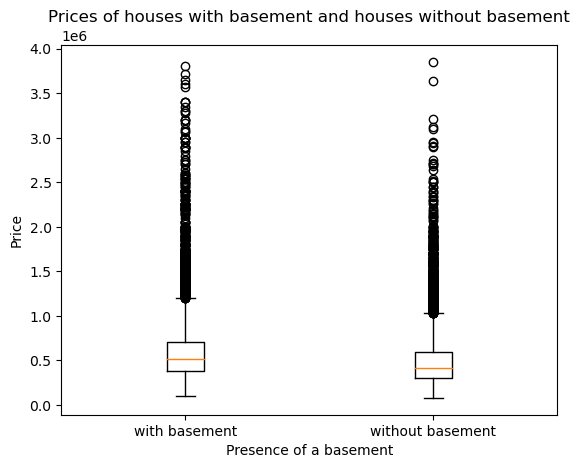

In [92]:
plt.figure()
plt.boxplot([houses_with_basement['price'], houses_without_basement['price']], labels=['with basement', 'without basement'])
plt.title('Prices of houses with basement and houses without basement')
plt.xlabel('Presence of a basement')
plt.ylabel('Price')

In [94]:
median_price_with_basement = houses_with_basement['price'].median()
median_price_without_basement = houses_without_basement['price'].median()

In [95]:
f'Median price of house with basement is {median_price_with_basement}, and without basement is {median_price_without_basement}'

'Median price of house with basement is 513000.0, and without basement is 410000.0'

In [96]:
Q1 = houses_with_basement['price'].quantile(0.25)
Q3 = houses_with_basement['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR #bounds for outliers
upper_bound = Q3 + 1.5 * IQR

outliers = houses_with_basement[(houses_with_basement['price'] < lower_bound) | (houses_with_basement['price'] > upper_bound)]

number_of_outliers = outliers.shape[0]
f'Numbers of outliers for group of houses with basement: {number_of_outliers}'

'Numbers of outliers for group of houses with basement: 583'

In [98]:
Q1_without = houses_without_basement['price'].quantile(0.25)
Q3_without = houses_without_basement['price'].quantile(0.75)

IQR_without = Q3_without - Q1_without

lower_bound_without = Q1_without - 1.5 * IQR #bounds for outliers
upper_bound_without = Q3_without + 1.5 * IQR

outliers_without = houses_without_basement[(houses_without_basement['price'] < lower_bound_without) | (houses_without_basement['price'] > upper_bound_without)]

number_of_outliers_without = outliers_without.shape[0]
f'Numbers of outliers for group of houses without basement: {number_of_outliers_without}'

'Numbers of outliers for group of houses without basement: 428'

In [99]:
corr_basement = df_houseprice['sqft_basement'].corr(df_houseprice['price'])
corr_basement

0.3031432047055834

In [100]:
std_basement = houses_with_basement['price'].std()
std_without_basement = houses_without_basement['price'].std()

In [101]:
cv_with_basement = std_basement / avg_price_with_basement
cv_with_basement

0.6358096942167152

In [102]:
cv_without_basement = std_without_basement / avg_price_without_basement
cv_without_basement

0.5944992146402601

Text(0, 0.5, 'Count')

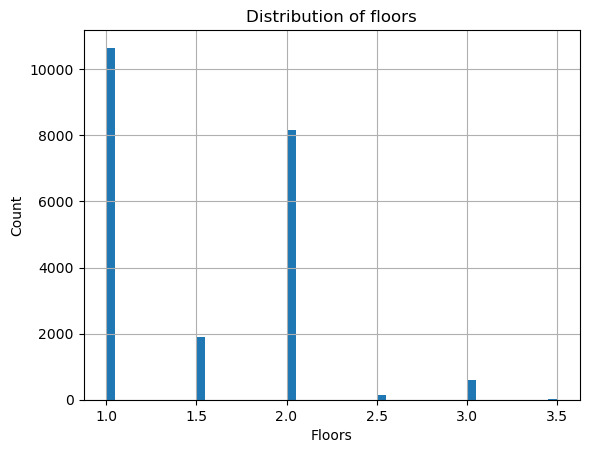

In [103]:
#Does the number of floors correlate with the price of a property?
plt.figure()
df_houseprice['floors'].hist(bins=50)
plt.title('Distribution of floors')
plt.xlabel('Floors')
plt.ylabel('Count')

In [104]:
grouped_floors = df_houseprice.groupby('floors')['price'].mean()
f'Average prices of houses by number of floors are: {grouped_floors}'

'Average prices of houses by number of floors are: floors\n1.0    440301.342908\n1.5    557191.930709\n2.0    635607.516797\n2.5    980229.391026\n3.0    577651.021346\n3.5    910214.285714\nName: price, dtype: float64'

Text(0, 0.5, 'Price')

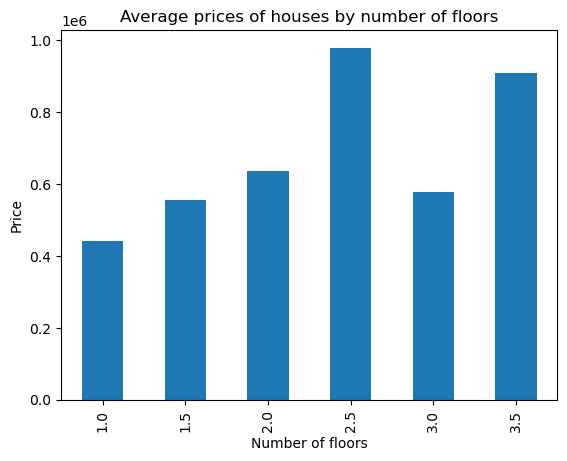

In [105]:
plt.figure()
grouped_floors.plot(kind='bar')
plt.title('Average prices of houses by number of floors')
plt.xlabel('Number of floors')
plt.ylabel('Price')

In [106]:
corr_floors = df_houseprice['floors'].corr(df_houseprice['price'])
f'Correlation coefficient equals {corr_plot_area}'

'Correlation coefficient equals 0.09011725157474261'

Text(0, 0.5, 'Count')

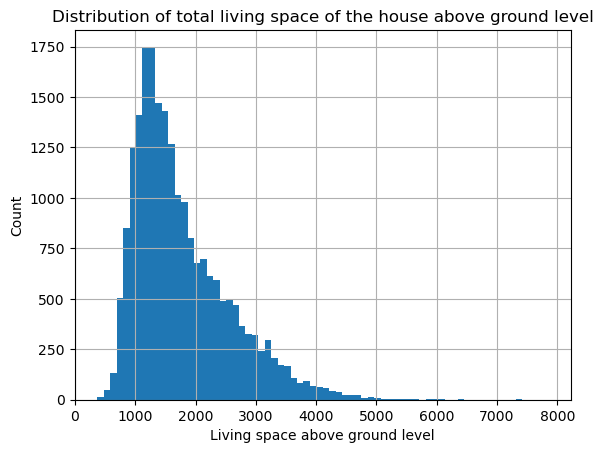

In [107]:
# Does the total living space of the house above ground level affect the price of the house?
plt.figure()
df_houseprice['sqft_above'].hist(bins=70)
plt.title('Distribution of total living space of the house above ground level')
plt.xlabel('Living space above ground level')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

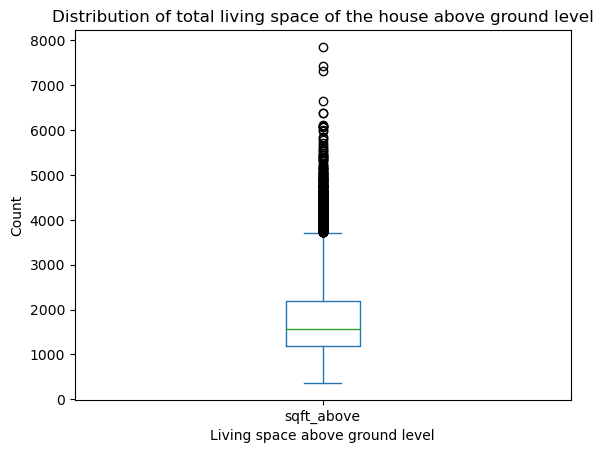

In [108]:
plt.figure()
df_houseprice['sqft_above'].plot.box()
plt.title('Distribution of total living space of the house above ground level')
plt.xlabel('Living space above ground level')
plt.ylabel('Count')

Text(0, 0.5, 'Price')

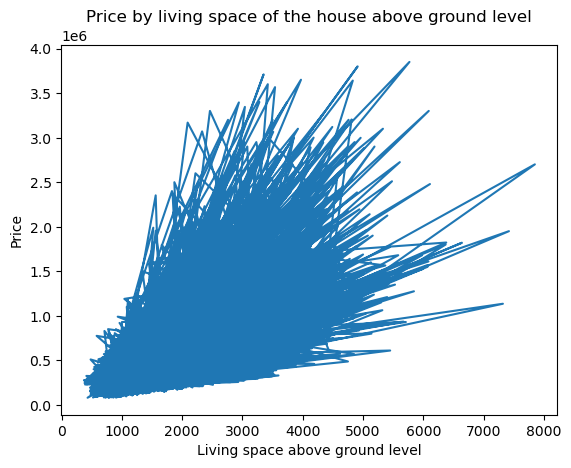

In [109]:
plt.figure()
plt.plot(df_houseprice['sqft_above'], df_houseprice['price'])
plt.title('Price by living space of the house above ground level')
plt.xlabel('Living space above ground level')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

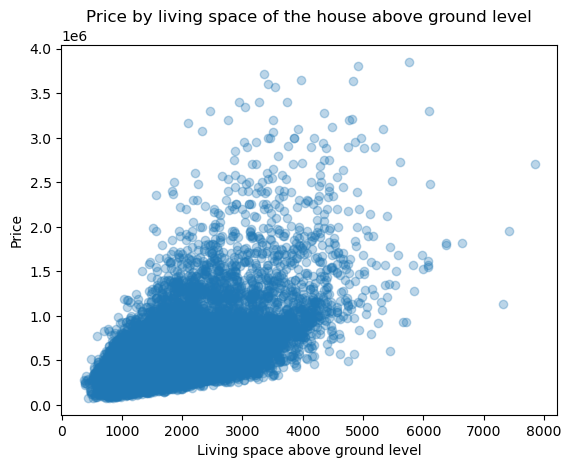

In [110]:
plt.figure()
plt.scatter(df_houseprice['sqft_above'], df_houseprice['price'], alpha=0.3)
plt.title('Price by living space of the house above ground level')
plt.xlabel('Living space above ground level')
plt.ylabel('Price')

In [111]:
corr_living_space_above = df_houseprice['sqft_above'].corr(df_houseprice['price'])
f'Correlation coefficient equals {corr_living_space_above}'

'Correlation coefficient equals 0.5843054944889328'

In [112]:
df_houseprice = df_houseprice[df_houseprice['sqft_above'] <= 6000.0 ]

Text(0, 0.5, 'Count')

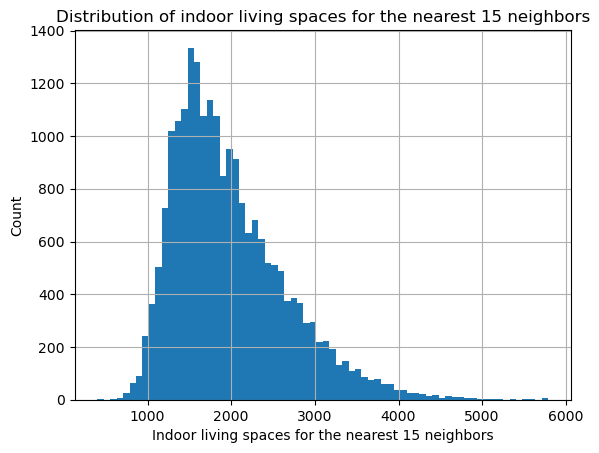

In [113]:
#Does the living space of indoor living spaces for the nearest 15 neighbors affect the price
#of a house? Does a similar correlation occur for the area of lots for the nearest 15 neighbors?
plt.figure()
df_houseprice['sqft_living15'].hist(bins=70)
plt.title('Distribution of indoor living spaces for the nearest 15 neighbors')
plt.xlabel('Indoor living spaces for the nearest 15 neighbors')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

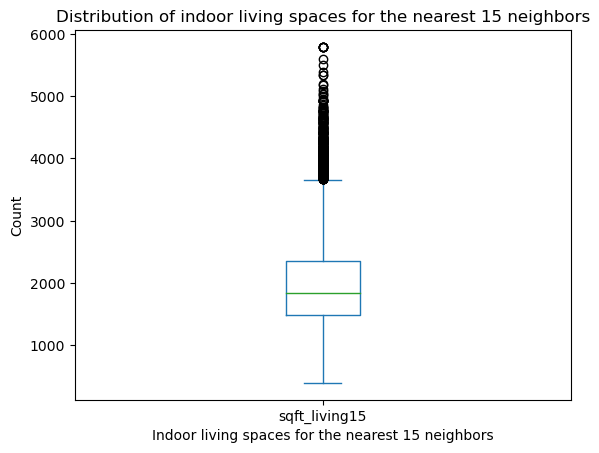

In [114]:
plt.figure()
df_houseprice['sqft_living15'].plot.box()
plt.title('Distribution of indoor living spaces for the nearest 15 neighbors')
plt.xlabel('Indoor living spaces for the nearest 15 neighbors')
plt.ylabel('Count')

Text(0, 0.5, 'Price')

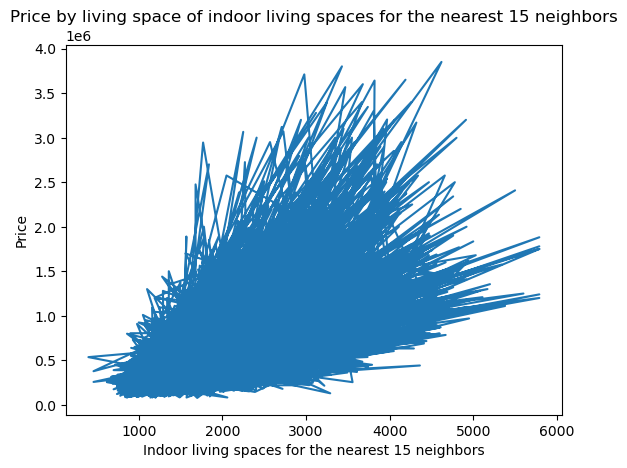

In [115]:
plt.figure()
plt.plot(df_houseprice['sqft_living15'], df_houseprice['price'])
plt.title('Price by living space of indoor living spaces for the nearest 15 neighbors')
plt.xlabel('Indoor living spaces for the nearest 15 neighbors')
plt.ylabel('Price')

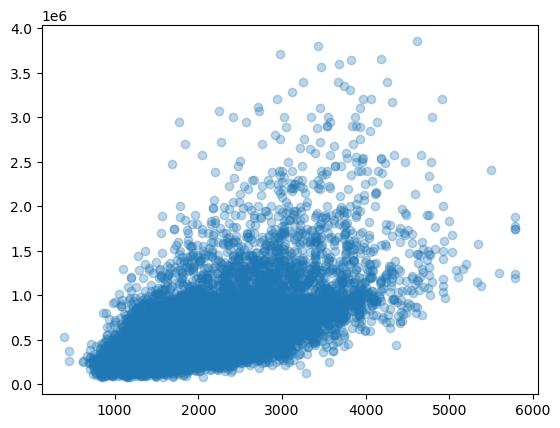

In [116]:
plt.figure()
plt.scatter(df_houseprice['sqft_living15'], df_houseprice['price'], alpha=0.3)

In [117]:
corr_living_15 = df_houseprice['sqft_living15'].corr(df_houseprice['price'])
f'Correlation coefficient equals {corr_living_15}'

'Correlation coefficient equals 0.5934924162368151'

In [118]:
df_houseprice = df_houseprice[df_houseprice['sqft_living15'] <= 5000.0]

Text(0, 0.5, 'Count')

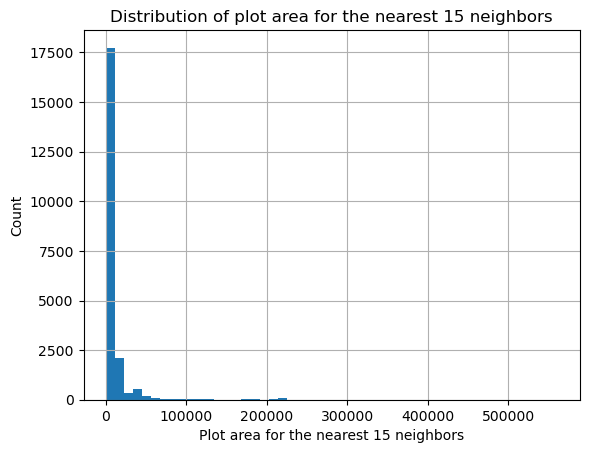

In [119]:
#Does the plot area of the nearest 15 neighbors affect the price?
plt.figure()
df_houseprice['sqft_lot15'].hist(bins=50)
plt.title('Distribution of plot area for the nearest 15 neighbors')
plt.xlabel('Plot area for the nearest 15 neighbors')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

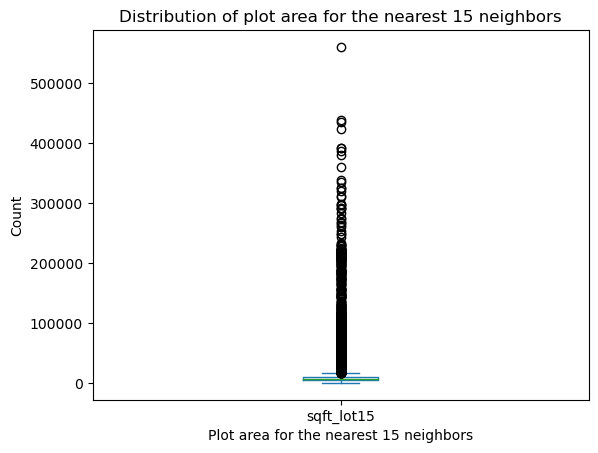

In [120]:
plt.figure()
df_houseprice['sqft_lot15'].plot.box()
plt.title('Distribution of plot area for the nearest 15 neighbors')
plt.xlabel('Plot area for the nearest 15 neighbors')
plt.ylabel('Count')

Text(0, 0.5, 'Price')

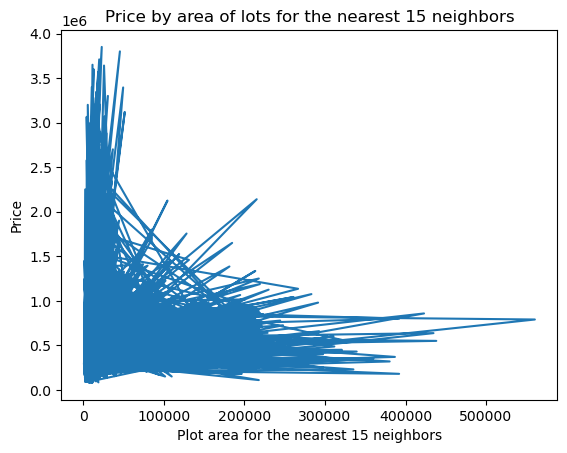

In [121]:
plt.figure()
plt.plot(df_houseprice['sqft_lot15'], df_houseprice['price'])
plt.title('Price by area of lots for the nearest 15 neighbors')
plt.xlabel('Plot area for the nearest 15 neighbors')
plt.ylabel('Price')

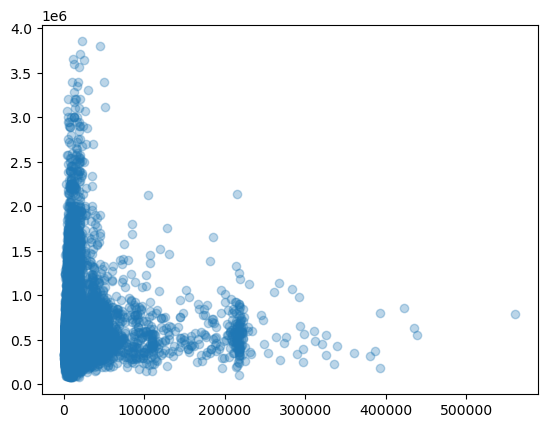

In [122]:
plt.figure()
plt.scatter(df_houseprice['sqft_lot15'], df_houseprice['price'], alpha=0.3)

In [123]:
corr_lot_15 = df_houseprice['sqft_lot15'].corr(df_houseprice['price'])
f'Correlation coefficient equals {corr_lot_15}'

'Correlation coefficient equals 0.0687180731439493'

In [124]:
df_houseprice = df_houseprice[df_houseprice['sqft_lot15'] <= 233500.0]

Text(0, 0.5, 'Count')

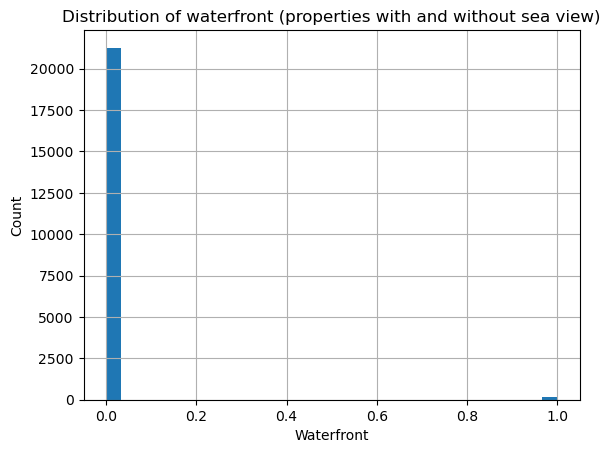

In [125]:
#Are houses with water views more expensive?
plt.figure()
df_houseprice['waterfront'].hist(bins=30)
plt.title('Distribution of waterfront (properties with and without sea view)')
plt.xlabel('Waterfront')
plt.ylabel('Count')

In [126]:
price_waterfront_stats = df_houseprice.groupby('waterfront')['price'].agg(['mean', 'median'])
price_waterfront_stats

,mean,median
waterfront,,
0,5.241783e+05,449950.0
1,1.509938e+06,1350000.0


In [127]:
corr_waterfront = df_houseprice['waterfront'].corr(df_houseprice['price'])
corr_waterfront

0.24928357915063218

Text(0, 0.5, 'Count')

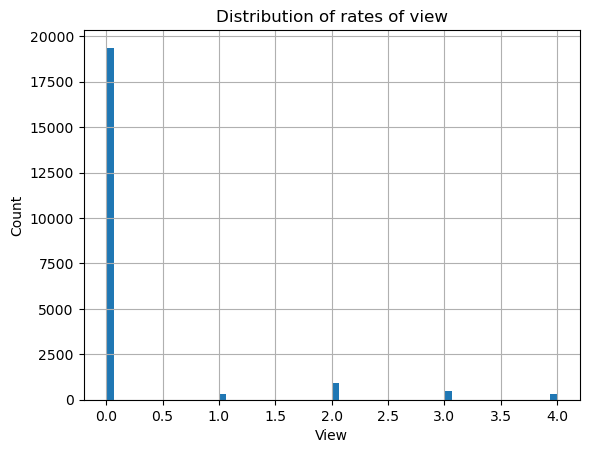

In [128]:
#How does the view rating correlate with the price of the house?
plt.figure()
df_houseprice['view'].hist(bins=60)
plt.title('Distribution of rates of view')
plt.xlabel('View')
plt.ylabel('Count')

In [129]:
df_houseprice['view'].value_counts()

view
0    19367
2      938
3      487
1      330
4      302
Name: count, dtype: int64

In [130]:
price_by_view = df_houseprice.groupby('view')['price'].mean()

Text(0, 0.5, 'Price')

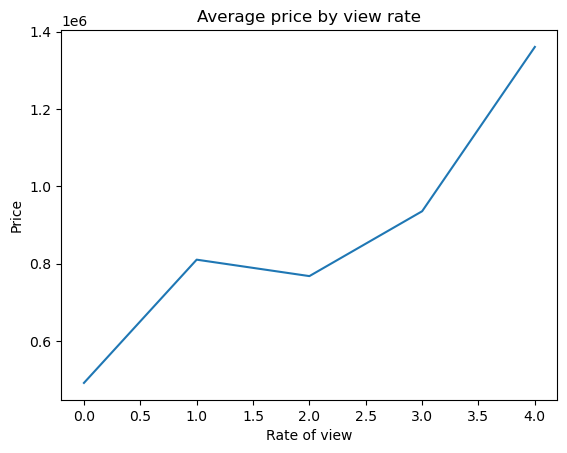

In [131]:
plt.figure()
price_by_view.plot(kind='line')
plt.title('Average price by view rate')
plt.xlabel('Rate of view')
plt.ylabel('Price')

In [132]:
price_view_stats = df_houseprice.groupby('view')['price'].agg(['mean', 'median',
                                                              'std', 'min', 'max'])
price_view_stats

,mean,median,std,min,max
view,,,,,
0,4.918934e+05,431000.0,269716.778509,78000.0,3400000.0
1,8.104734e+05,690944.0,510033.502710,217000.0,3650000.0
2,7.679857e+05,669375.0,436955.224709,169317.0,3710000.0
3,9.356454e+05,790000.0,517446.798817,154000.0,3204000.0
4,1.360368e+06,1157500.0,765546.680666,252000.0,3850000.0


Text(0, 0.5, 'Price')

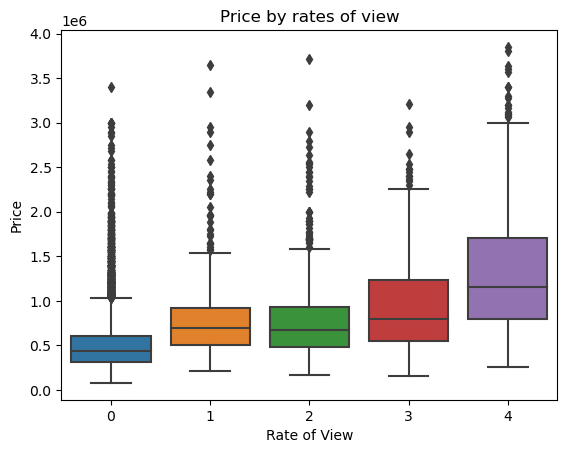

In [133]:
plt.figure()
sns.boxplot(x='view', y='price', data=df_houseprice)
plt.title('Price by rates of view')
plt.xlabel('Rate of View')
plt.ylabel('Price')

In [134]:
corr_view_rate = df_houseprice['view'].corr(df_houseprice['price'])
corr_view_rate

0.3956485264829638

Text(0, 0.5, 'Count')

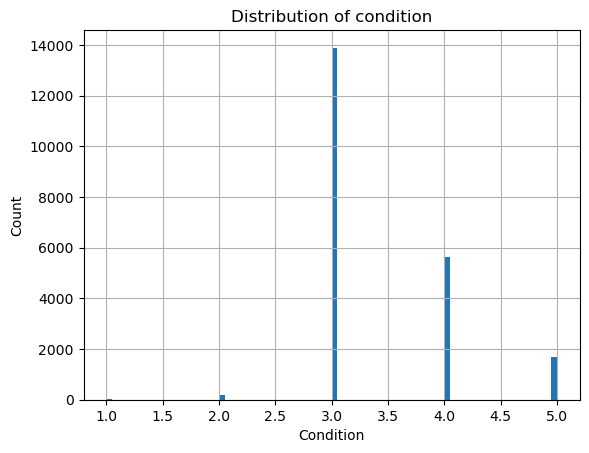

In [135]:
#Is the better condition of the house related to a higher selling price?
plt.figure()
df_houseprice['condition'].hist(bins=80)
plt.title('Distribution of condition')
plt.xlabel('Condition')
plt.ylabel('Count')

In [136]:
df_houseprice['condition'].value_counts()

condition
3    13890
4     5642
5     1694
2      169
1       29
Name: count, dtype: int64

Text(0, 0.5, 'Count')

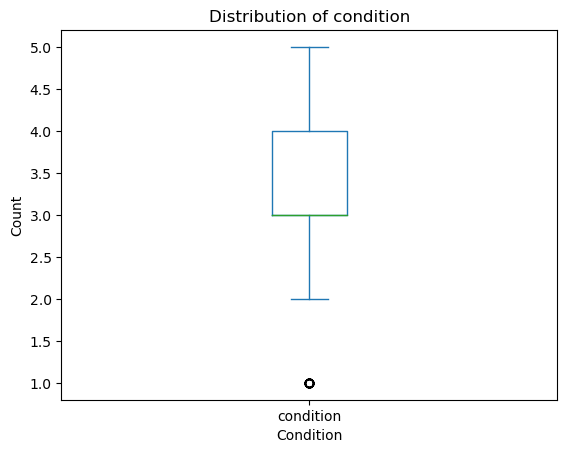

In [137]:
plt.figure()
df_houseprice['condition'].plot.box()
plt.title('Distribution of condition')
plt.xlabel('Condition')
plt.ylabel('Count')

Text(0, 0.5, 'Price')

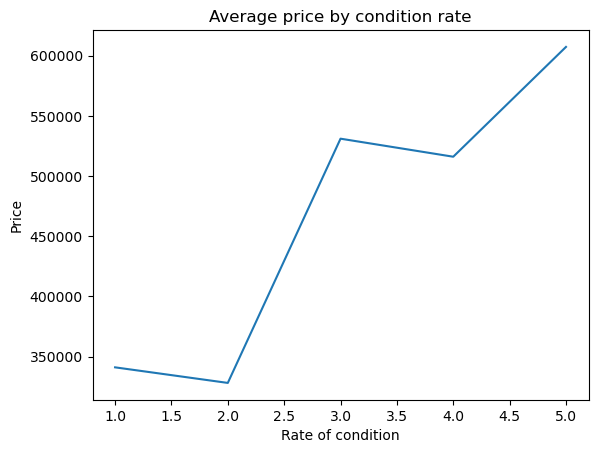

In [138]:
price_by_cond = df_houseprice.groupby('condition')['price'].mean()

plt.figure()
price_by_cond.plot(kind='line')
plt.title('Average price by condition rate')
plt.xlabel('Rate of condition')
plt.ylabel('Price')

In [139]:
price_cond_stats = df_houseprice.groupby('condition')['price'].agg(['mean', 'median',
                                                                    'std', 'min', 'max'])
price_cond_stats

,mean,median,std,min,max
condition,,,,,
1,341067.241379,270000.0,273482.773771,78000.0,1500000.0
2,328126.562130,279000.0,247323.006427,80000.0,2555000.0
3,530995.342261,450000.0,324579.613943,82000.0,3800000.0
4,516010.685041,440000.0,330607.713114,89000.0,3850000.0
5,607210.548996,525000.0,394963.648789,110000.0,3200000.0


In [140]:
df_houseprice = df_houseprice[df_houseprice['condition'] > 1.0]

Text(0, 0.5, 'Price')

<Figure size 640x480 with 0 Axes>

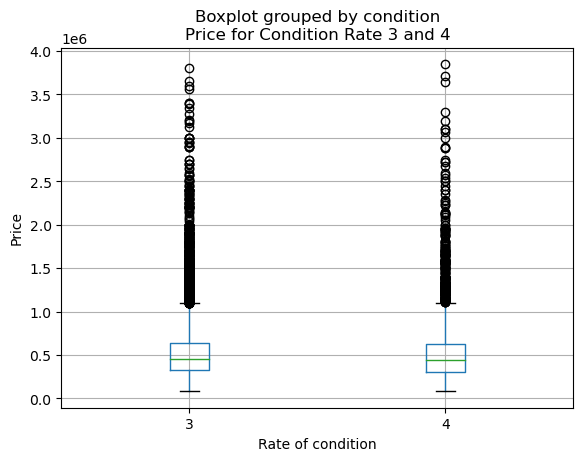

In [141]:
condition_3_and_4 = df_houseprice[df_houseprice['condition'].isin([3.0, 4.0])]

plt.figure()
condition_3_and_4.boxplot(column='price', by='condition')
plt.title('Price for Condition Rate 3 and 4')
plt.xlabel('Rate of condition')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

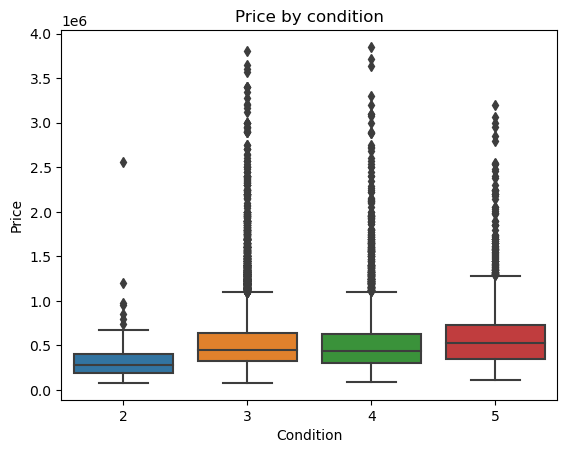

In [142]:
plt.figure()
sns.boxplot(x='condition', y='price', data=df_houseprice)
plt.title('Price by condition')
plt.xlabel('Condition')
plt.ylabel('Price')

In [143]:
corr_cond_rate = df_houseprice['condition'].corr(df_houseprice['price'])
corr_cond_rate

0.04428958254846119

Text(0, 0.5, 'Count')

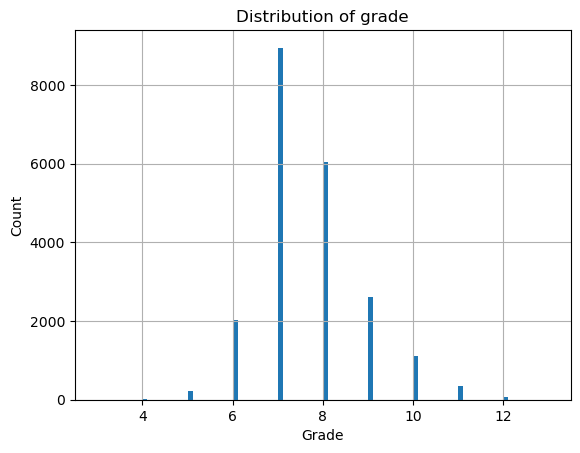

In [144]:
#Is the better grade of the house related to a higher selling price?
plt.figure()
df_houseprice['grade'].hist(bins=90)
plt.title('Distribution of grade')
plt.xlabel('Grade')
plt.ylabel('Count')

In [145]:

df_houseprice['grade'].value_counts()

grade
7     8943
8     6048
9     2603
6     2020
10    1110
11     351
5      229
12      59
4       28
13       3
3        1
Name: count, dtype: int64

Text(0, 0.5, 'Count')

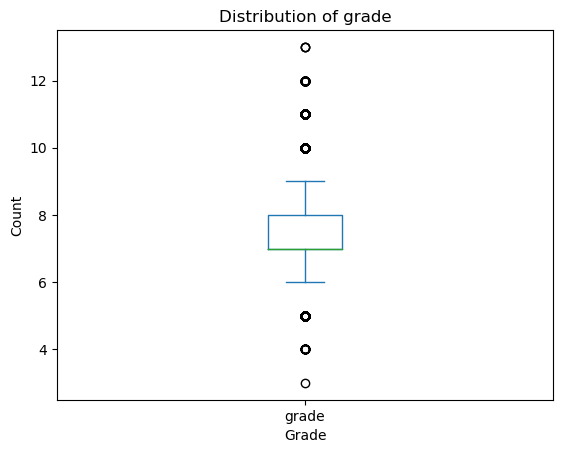

In [146]:
plt.figure()
df_houseprice['grade'].plot.box()
plt.title('Distribution of grade')
plt.xlabel('Grade')
plt.ylabel('Count')

Text(0, 0.5, 'Price')

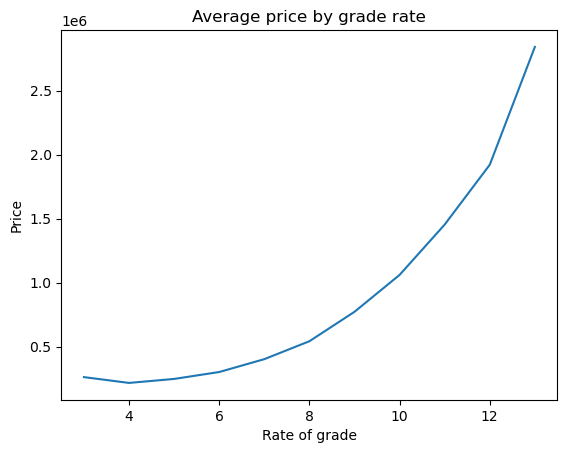

In [147]:
price_by_grade = df_houseprice.groupby('grade')['price'].mean()

plt.figure()
price_by_grade.plot(kind='line')
plt.title('Average price by grade rate')
plt.xlabel('Rate of grade')
plt.ylabel('Price')

In [148]:
price_grade_stats = df_houseprice.groupby('grade')['price'].agg(['mean', 'median',
                                                                    'std', 'min', 'max'])
price_grade_stats

,mean,median,std,min,max
grade,,,,,
3,2.620000e+05,262000.0,NaN,262000.0,262000.0
4,2.166804e+05,211000.0,95205.302859,80000.0,435000.0
5,2.478659e+05,230000.0,113208.858812,82500.0,795000.0
6,3.018605e+05,276000.0,122833.787285,82000.0,1200000.0
7,4.023319e+05,375000.0,155708.111156,90000.0,2050000.0
8,5.423695e+05,510000.0,216276.780332,140000.0,3070000.0
9,7.723258e+05,720000.0,314474.332947,230000.0,2700000.0
10,1.060579e+06,908995.0,472479.859502,316000.0,3600000.0
11,1.453823e+06,1250000.0,627055.872268,420000.0,3850000.0


Text(0, 0.5, 'Price')

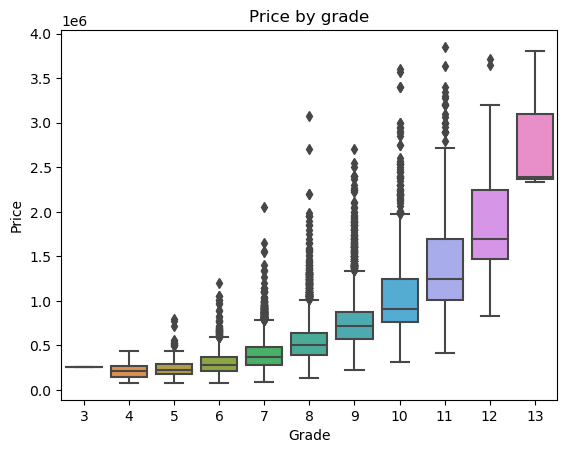

In [149]:
plt.figure()
sns.boxplot(x='grade', y='price', data=df_houseprice)
plt.title('Price by grade')
plt.xlabel('Grade')
plt.ylabel('Price')

In [150]:
corr_grade_rate = df_houseprice['grade'].corr(df_houseprice['price'])
corr_grade_rate

0.6682153830756898

In [151]:
df_houseprice = df_houseprice[(df_houseprice['grade'] <= 11.0) & (df_houseprice['grade'] > 4.0)]

<Axes: xlabel='number_of_rooms'>

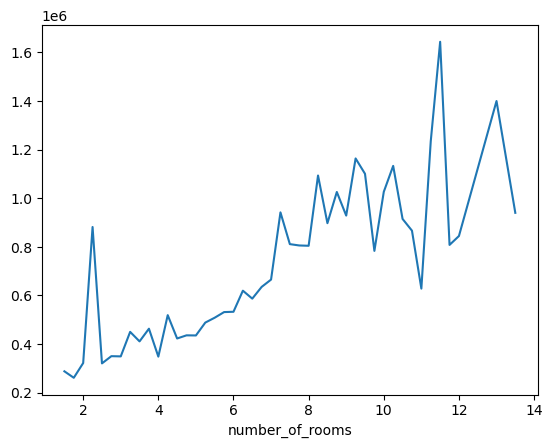

In [152]:
#NEW COLUMNS
#number of all rooms
df_houseprice['number_of_rooms'] = df_houseprice['bedrooms'] + df_houseprice['bathrooms']
price_by_rooms = df_houseprice.groupby('number_of_rooms')['price'].mean()

plt.figure()
price_by_rooms.plot(kind='line')

In [153]:
df_houseprice['number_of_rooms'].corr(df_houseprice['price'])

0.44801495545552505

-0.036709210405156775

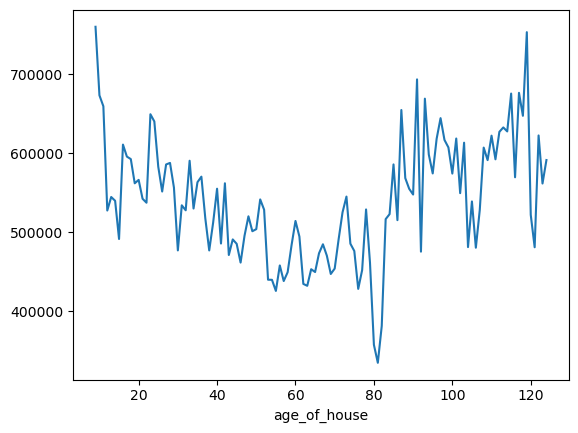

In [154]:
#age of house
current_year = datetime.now().year

df_houseprice['age_of_house'] = current_year - df_houseprice['yr_built']
price_by_age = df_houseprice.groupby('age_of_house')['price'].mean()

plt.figure()
price_by_age.plot(kind='line')
df_houseprice['age_of_house'].corr(df_houseprice['price'])

0.3942826557144292

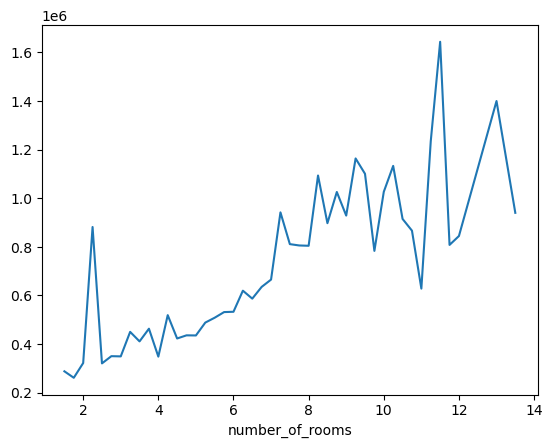

In [155]:
#scale of view
df_houseprice['view_scale'] = df_houseprice['waterfront'] + df_houseprice['view']
price_by_view_sc = df_houseprice.groupby('view_scale')['price'].mean()

plt.figure()
price_by_rooms.plot(kind='line')

df_houseprice['view_scale'].corr(df_houseprice['price'])

In [156]:
df_houseprice['view_scale'].corr(df_houseprice['price'])

0.3942826557144292

0.48699141293319803

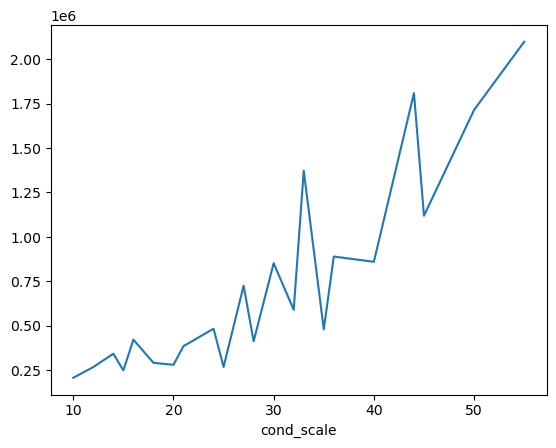

In [157]:
#condition scale
df_houseprice['cond_scale'] = df_houseprice['condition'] * df_houseprice['grade']
price_by_cond_sc = df_houseprice.groupby('cond_scale')['price'].mean()

plt.figure()
price_by_cond_sc.plot(kind='line')

df_houseprice['cond_scale'].corr(df_houseprice['price'])

In [158]:
df_houseprice['dist_to_downtown_km'].corr(df_houseprice['price'])

-0.2329681301898141

In [159]:
df_houseprice = df_houseprice.drop(columns=['date', 'zipcode', 'lat', 'long',
                                            'yr_renovated', 'price', 'yr_built',
                                            'price_by_sqft', 'dist_to_downtown',
                                            'dist_to_bellevue', 'dist_to_northwest_seattle',
                                            'decade', 'dist_to_downtown_km_bins',
                                            'dist_to_bellevue_km_bins',
                                            'dist_to_northwest_seattle_km_bins'])

In [160]:
correlation = df_houseprice.corr()
correlation

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,dist_to_downtown_km,dist_to_bellevue_km,dist_to_northwest_seattle_km,price_log,number_of_rooms,age_of_house,view_scale,cond_scale
bedrooms,1.000000,0.513024,0.595108,0.041329,0.172035,-0.015207,0.070095,0.022910,0.351164,0.485476,0.299416,0.399208,0.036074,0.082422,-0.087546,0.105713,0.334624,0.895228,-0.154989,0.065280,0.255048
bathrooms,0.513024,1.000000,0.736290,0.077283,0.507728,0.045747,0.162561,-0.132585,0.648783,0.661886,0.260003,0.557471,0.071469,0.140435,-0.062679,0.139656,0.524480,0.841771,-0.516334,0.159908,0.315184
sqft_living,0.595108,0.736290,1.000000,0.183467,0.351896,0.079107,0.257109,-0.059372,0.746680,0.862850,0.418021,0.755627,0.180270,0.134224,-0.102284,0.138103,0.675530,0.756495,-0.320598,0.253623,0.444243
sqft_lot,0.041329,0.077283,0.183467,1.000000,-0.021824,0.022646,0.066601,-0.005727,0.118171,0.191451,0.017285,0.175978,0.793084,0.297010,0.206983,0.271691,0.095273,0.066111,-0.059091,0.065924,0.073438
floors,0.172035,0.507728,0.351896,-0.021824,1.000000,0.021967,0.021178,-0.270673,0.459995,0.531010,-0.261730,0.274212,-0.028343,0.049818,-0.008676,0.036715,0.302149,0.371770,-0.490081,0.022515,0.066610
waterfront,-0.015207,0.045747,0.079107,0.022646,0.021967,1.000000,0.392106,0.019311,0.063577,0.053124,0.060432,0.075806,0.038580,-0.015883,0.006281,-0.017811,0.158209,0.014185,0.031296,0.479214,0.060446
view,0.070095,0.162561,0.257109,0.066601,0.021178,0.392106,1.000000,0.051495,0.227410,0.137393,0.259638,0.261278,0.058619,-0.077971,-0.020436,-0.085653,0.329499,0.128473,0.064502,0.995315,0.203643
condition,0.022910,-0.132585,-0.059372,-0.005727,-0.270673,0.019311,0.051495,1.000000,-0.156584,-0.165355,0.180091,-0.092020,0.001547,-0.083376,-0.063980,-0.078435,0.041278,-0.054420,0.371288,0.051161,0.747173
grade,0.351164,0.648783,0.746680,0.118171,0.459995,0.063577,0.227410,-0.156584,1.000000,0.739318,0.141186,0.703623,0.116953,0.065465,-0.147153,0.055549,0.683256,0.557651,-0.450012,0.223655,0.528500
sqft_above,0.485476,0.661886,0.862850,0.191451,0.531010,0.053124,0.137393,-0.165355,0.739318,1.000000,-0.097837,0.726838,0.190211,0.259654,-0.020420,0.260708,0.572958,0.648921,-0.431873,0.136671,0.341291


Text(0.5, 1.0, 'Correlation Matrix')

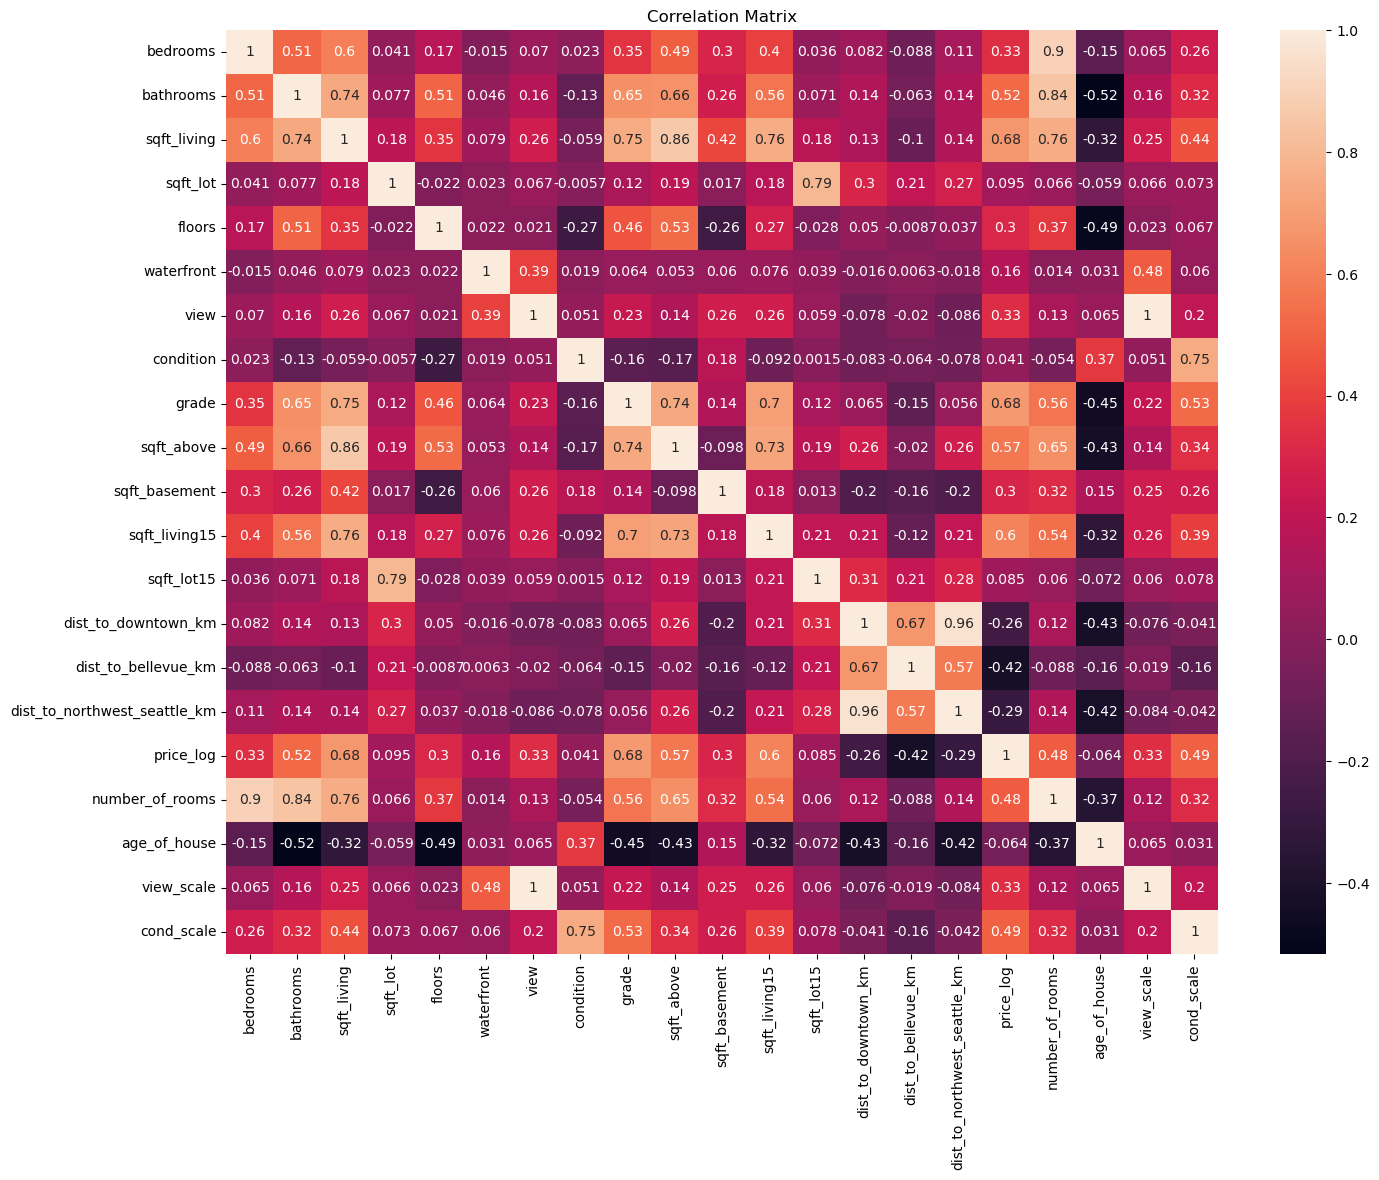

In [162]:
plt.figure(figsize=(16,12))
sns.heatmap(correlation, annot=True)
plt.title('Correlation Matrix')

In [163]:
df_houseprice = df_houseprice.drop(columns=['sqft_above', 'dist_to_downtown_km',
                                            'view_scale', 'bedrooms'])